# OKCupid user analysis

## Loading up the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import util
import statistics

features = ["age", "body_type", "diet", "drinks", "drugs", "education", "ethnicity",
            "height", "income", "job", "location", "offspring", "orientation",
            "pets", "religion", "sex", "sign", "smokes", "speaks", "status"]


data = pd.read_csv("data/profiles.zip", delimiter = ",")

print(data.info())
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

## Initial EDA

In [2]:
display(data)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,"oakland, california",has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single
59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,...,"south san francisco, california",doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,it used to be the hair until i mowed it off bu...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying 

In [4]:
for col in data.columns:
    print("Feature: {}".format(col))
    print("Percentage of missing values: {}".format(data[col].isna().sum() / len(data[col])))
    if (data[col].dtype == int) or (data[col].dtype == float):
        print("\n")
    else:
        print("Num. of unique categories: {}\n".format(data[col].nunique()))

Feature: age
Percentage of missing values: 0.0


Feature: body_type
Percentage of missing values: 0.08834617822707103
Num. of unique categories: 12

Feature: diet
Percentage of missing values: 0.4069495879624996
Num. of unique categories: 18

Feature: drinks
Percentage of missing values: 0.04979481533380042
Num. of unique categories: 6

Feature: drugs
Percentage of missing values: 0.23487805691789276
Num. of unique categories: 3

Feature: education
Percentage of missing values: 0.1105661762252694
Num. of unique categories: 32

Feature: ethnicity
Percentage of missing values: 0.09475194341574084
Num. of unique categories: 217

Feature: height
Percentage of missing values: 5.0045040536482834e-05


Feature: income
Percentage of missing values: 0.0


Feature: job
Percentage of missing values: 0.13675641410602876
Num. of unique categories: 21

Feature: location
Percentage of missing values: 0.0
Num. of unique categories: 199

Feature: offspring
Percentage of missing values: 0.59321722883928

## Feature engineering

### Variables that can be coded as "not disclosed"
(missing values coded as "not disclosed". Some might still be inspected manually later)

In [21]:
vars_to_code = ["body_type", "diet", "drinks", "drugs", "job", "offspring", "pets",
                "religion", "smokes", "sign", "education"]

for col in vars_to_code:
    data[col] = data[col].fillna("not disclosed")

### Variables that have to be addressed manually

#### ethnicity

In [22]:
# clean the entries and fill the missing values
data["ethnicity"] = data["ethnicity"].str.strip()
data["ethnicity"] = data["ethnicity"].str.lower()
data["ethnicity"] = data["ethnicity"].fillna("unknown")

print(data["ethnicity"].unique())
print(data["ethnicity"].nunique())

['asian, white' 'white' 'unknown' 'asian, black, other' 'white, other'
 'hispanic / latin, white' 'hispanic / latin' 'pacific islander, white'
 'asian' 'black, white' 'pacific islander' 'asian, native american'
 'asian, pacific islander' 'black, native american, white'
 'middle eastern, other' 'native american, white' 'indian' 'black'
 'black, native american, hispanic / latin, other'
 'black, native american, hispanic / latin'
 'asian, black, pacific islander'
 'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other'
 'other' 'hispanic / latin, other' 'asian, black' 'middle eastern, white'
 'native american, white, other' 'black, native american'
 'black, white, other' 'hispanic / latin, white, other' 'middle eastern'
 'black, other' 'native american, hispanic / latin, white' 'black, indian'
 'indian, white, other' 'middle eastern, indian, other'
 'black, native american, hispanic / latin, white, other'
 'pacific islander, hispanic / la

In [23]:
asian_rows = data[data["ethnicity"].str.contains(r"white", regex = True,
                                                 na = False, flags = re.IGNORECASE)]
print(asian_rows["ethnicity"].unique())
print(asian_rows["ethnicity"].nunique())

['asian, white' 'white' 'white, other' 'hispanic / latin, white'
 'pacific islander, white' 'black, white' 'black, native american, white'
 'native american, white'
 'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other'
 'middle eastern, white' 'native american, white, other'
 'black, white, other' 'hispanic / latin, white, other'
 'native american, hispanic / latin, white' 'indian, white, other'
 'black, native american, hispanic / latin, white, other'
 'black, hispanic / latin, white' 'indian, white' 'asian, white, other'
 'asian, hispanic / latin, white'
 'asian, black, native american, pacific islander, white'
 'black, native american, white, other'
 'middle eastern, native american, white'
 'asian, native american, white, other'
 'pacific islander, hispanic / latin, white'
 'black, native american, hispanic / latin, white'
 'asian, black, native american, hispanic / latin, white'
 'asian, black, white' 'middle eastern, hispanic /

Given the hyperspecificity of the categories, we'll group them into:
- white only
- black only
- asian only
- latino / hispanic only
- native american
- pacific islander
- indian
- middle eastern
- other
- mixed
    - Users with 2 or more ethnicities
- unknown
    - Missing values

In [24]:
# number of white only
white_only = len(data["ethnicity"][data["ethnicity"] == "white"])
print("white only: {}".format(white_only))

# number of black only
black_only = len(data["ethnicity"][data["ethnicity"] == "black"])
print("black only: {}".format(black_only))
      
# number of asian only
asian_only = len(data["ethnicity"][data["ethnicity"] == "asian"])
print("asian only: {}".format(asian_only))

# number of latino / hispanic only
lat_hisp_only = len(data["ethnicity"][data["ethnicity"] == "hispanic / latin"])
print("latino / hispanic only {}".format(lat_hisp_only))

# number of native american
nat_american = len(data["ethnicity"][data["ethnicity"] == "native american"])
print("native american: {}".format(nat_american))

# number of pacific islander
pac_islander = len(data["ethnicity"][data["ethnicity"] == "pacific islander"])
print("pacific islander: {}".format(pac_islander))

# number of indian
indian = len(data["ethnicity"][data["ethnicity"] == "indian"])
print("indian: {}".format(indian))

#number of middle eastern
mid_east = len(data["ethnicity"][data["ethnicity"] == "middle eastern"])
print("middle eastern: {}".format(mid_east))

# number of other
other_eth = len(data["ethnicity"][data["ethnicity"] == "other"])
print("other: {}".format(other_eth))

# number of mixed
mixed_eth = data["ethnicity"].str.contains("[,]", regex = True, na = False).sum()
print("mixed: {}".format(mixed_eth))

# number of unknown
unknown_eth = len(data["ethnicity"][data["ethnicity"] == "unknown"])
print("unknown: {}".format(unknown_eth))

# perform the category changes
data["ethnicity"] = data["ethnicity"].apply(util.assign_eth)
print(data["ethnicity"].unique())


white only: 32831
black only: 2008
asian only: 6134
latino / hispanic only 2823
native american: 67
pacific islander: 432
indian: 1077
middle eastern: 329
other: 1706
mixed: 6859
unknown: 5680
['mixed' 'white only' 'unknown' 'latino / hispanic only' 'asian only'
 'pacific islander' 'indian' 'black only' 'middle eastern'
 'native american']


#### height

In [25]:
print(sorted(data["height"].unique()))

[np.float64(1.0), np.float64(3.0), np.float64(4.0), np.float64(6.0), np.float64(8.0), np.float64(9.0), np.float64(26.0), np.float64(36.0), np.float64(37.0), np.float64(42.0), np.float64(43.0), np.float64(47.0), np.float64(48.0), np.float64(49.0), np.float64(50.0), np.float64(51.0), np.float64(52.0), np.float64(53.0), np.float64(54.0), np.float64(55.0), np.float64(56.0), np.float64(57.0), np.float64(58.0), np.float64(59.0), np.float64(60.0), np.float64(61.0), np.float64(62.0), np.float64(63.0), np.float64(64.0), np.float64(65.0), np.float64(66.0), np.float64(67.0), np.float64(68.0), np.float64(69.0), np.float64(70.0), np.float64(71.0), np.float64(72.0), np.float64(73.0), np.float64(74.0), np.float64(75.0), np.float64(76.0), np.float64(77.0), np.float64(78.0), np.float64(79.0), np.float64(80.0), np.float64(81.0), np.float64(82.0), np.float64(83.0), np.float64(84.0), np.float64(85.0), np.float64(86.0), np.float64(87.0), np.float64(88.0), np.float64(89.0), np.float64(90.0), np.float64(91.0

We will assume that anything below 50 inches (assuming we have users with dwarfism) is a mistake. Also, anything above 83 inches in height is extremely unlikely, so we will assume it's also a typo/mistake.

[75. 70. 68. 71. 66. 67. 65. 72. 62. 64. 69. 73. 74. 60. 63. 76. 61. 78.
 79. 59. 80. nan 83. 77. 58. 56. 57. 81. 52. 55. 53. 54. 82. 50. 51.]
72.0


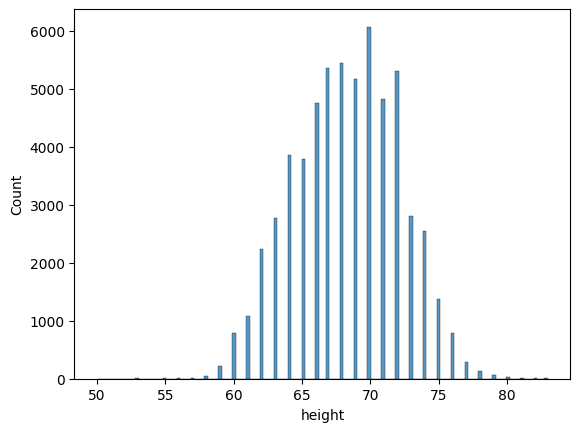

In [26]:
data["height"] = data["height"].where(((data["height"] >= 50) & (data["height"] <= 83)), np.nan)
print(data["height"].unique())
print(data["height"][data["height"].isna().sum()])

sns.histplot(data["height"])
plt.show()

There are only 66 values out of almost 60,000, and the points are normally distributed

[75. 70. 68. 71. 66. 67. 65. 72. 62. 64. 69. 73. 74. 60. 63. 76. 61. 78.
 79. 59. 80. 83. 77. 58. 56. 57. 81. 52. 55. 53. 54. 82. 50. 51.]


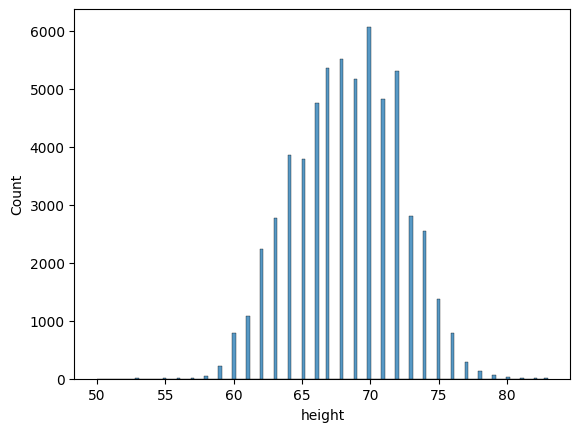

In [27]:
# replace missing values with the median of the distribution
data["height"] = data["height"].fillna(-1)
data["height"] = data["height"].replace(-1, np.median(data["height"]))

print(data["height"].unique())

sns.histplot(data["height"])
plt.show()

#### income

In [28]:
print(data["income"].unique())
print(list(data["income"]).count(-1) /  len(data["income"]))

[     -1   80000   20000   40000   30000   50000   60000 1000000  150000
  100000  500000   70000  250000]
0.8080939512227672


Either missing or undisclosed values coded as -1, with 80% of the users not disclosing their income.<br><br>
Due to the high volume of missing data, model imputation can lead to misleading results.<br><br>
Therefore, we'll create an indicator flag of whether a user's income was disclosed (1) or not disclosed (0) and a capped income column containing:
- The actual income for those users who did disclose it.<br>
- The median income of the disclosed 20% for the users that did not disclose it.<br>

In [29]:
# create an income_disclosed column in the df
data["income_disclosed"] = [0 if i == -1 else 1 for i in data["income"]]

# fix the income column to replace -1 with the median income
incomes = data["income"][data["income"] != -1]
median_income_disclosed = np.median(incomes)

data["income_imputed"] = [median_income_disclosed if i == -1 else i for i in data["income"]]
print(data["income_imputed"].unique())

[  50000.   80000.   20000.   40000.   30000.   60000. 1000000.  150000.
  100000.  500000.   70000.  250000.]


#### speaks

In [30]:
print(data["speaks"].unique())
print(data["speaks"].nunique())

['english' 'english (fluently), spanish (poorly), french (poorly)'
 'english, french, c++' ...
 'english (fluently), hindi (poorly), french (poorly), tamil (okay), spanish (poorly)'
 'english (fluently), french (poorly), japanese (poorly), latin (poorly)'
 'english (fluently), french, farsi']
7647


In [31]:
# check how many users speak english
print(len(data["speaks"][data["speaks"].str.contains("english", regex = True,
                                                 na = False, flags = re.IGNORECASE)]))
print(len(data["speaks"][data["speaks"].isna()]))

# check where the locations of the users
print(data[["location", "speaks"]][data["speaks"].isna()])

59896
50
                        location speaks
1664   san francisco, california    NaN
1755   san francisco, california    NaN
2217   san francisco, california    NaN
2765   san francisco, california    NaN
6188   san francisco, california    NaN
8217   san francisco, california    NaN
9636       palo alto, california    NaN
11358  san francisco, california    NaN
12595        oakland, california    NaN
13591  san francisco, california    NaN
14827      palo alto, california    NaN
15539  san francisco, california    NaN
15558  san francisco, california    NaN
16837  san francisco, california    NaN
17511      san mateo, california    NaN
17737  san francisco, california    NaN
19625  san francisco, california    NaN
20931  san francisco, california    NaN
21891  san francisco, california    NaN
21934  san francisco, california    NaN
23597      lagunitas, california    NaN
23769     el cerrito, california    NaN
23792  san francisco, california    NaN
25063       pacifica, californi

Only 50 users are missing information about the language they speak.<br><br>
Also, these 50 users are all from California. If all other users from California (or at least the vast majority of them) speak English, it would be fair to assume that these 50 users missing that value do so as well.

In [32]:
display(data[["location", "speaks"]][data["location"].str.contains("california", 
                                                                   regex = True,
                                                                   na = True,
                                                                   flags = re.IGNORECASE)])

data["speaks"] = data["speaks"].fillna("english")
print(data["speaks"].isna().sum())

,location,speaks
0,"south san francisco, california",english
1,"oakland, california","english (fluently), spanish (poorly), french (..."
2,"san francisco, california","english, french, c++"
3,"berkeley, california","english, german (poorly)"
4,"san francisco, california",english
...,...,...
59941,"oakland, california",english
59942,"san francisco, california",english (fluently)
59943,"south san francisco, california",english (fluently)
59944,"san francisco, california","english (fluently), spanish (poorly), chinese ..."


0


With the missing values handled, we proceed to turn the speaks column into a manageable number of categories

In [33]:
# create a new column that tells us how many languages the user speaks
data["num_languages"] = data["speaks"].apply(util.count_languages)
print(data["num_languages"].unique())

[1 3 2 4 5]


#### location

In [34]:
print(data["location"].unique())

['south san francisco, california' 'oakland, california'
 'san francisco, california' 'berkeley, california'
 'belvedere tiburon, california' 'san mateo, california'
 'daly city, california' 'san leandro, california' 'atherton, california'
 'san rafael, california' 'walnut creek, california'
 'menlo park, california' 'belmont, california' 'san jose, california'
 'palo alto, california' 'emeryville, california' 'el granada, california'
 'castro valley, california' 'fairfax, california'
 'mountain view, california' 'burlingame, california'
 'martinez, california' 'pleasant hill, california' 'hayward, california'
 'alameda, california' 'vallejo, california' 'benicia, california'
 'el cerrito, california' 'mill valley, california' 'richmond, california'
 'redwood city, california' 'el sobrante, california'
 'stanford, california' 'san pablo, california' 'novato, california'
 'pacifica, california' 'lafayette, california'
 'half moon bay, california' 'fremont, california' 'orinda, californi

The location appears to be coded "city, state" or "city, country" for those not in the US.<br><br>
With this in mind, we can reduce this to the region within the US.

In [35]:
# assign users to their region within the US or classify them as out of the country
data["location"] = data["location"].apply(util.classify_location)
print(data["location"].unique())

['west' 'northeast' 'midwest' 'south' 'not united states']


#### education

In [36]:
print(data["education"].unique())

['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' 'not disclosed'
 'graduated from high school' 'working on masters program'
 'graduated from space camp' 'college/university'
 'dropped out of space camp' 'graduated from ph.d program'
 'graduated from law school' 'working on ph.d program' 'two-year college'
 'graduated from two-year college' 'working on med school'
 'dropped out of college/university' 'space camp'
 'graduated from med school' 'dropped out of high school'
 'working on high school' 'masters program' 'dropped out of ph.d program'
 'dropped out of two-year college' 'dropped out of med school'
 'high school' 'working on law school' 'law school'
 'dropped out of masters program' 'ph.d program'
 'dropped out of law school' 'med school']


We'll map these to other categories so that we can reduce the cardinality:
- High school or less
    - "graduated from high school"
    - "dropped out of high school"
    - "working on high school"
    - "high school"
    - "dropped out of college/university"
    - "dropped out of two-year college"
    - "dropped out of med school"
    - "dropped out of law school"
- University/College
    - "working on college/university"
    - "graduated from college/university"
    - "working on two-year college"
    - "college/university"
    - "two-year college"
    - "graduated from two-year college"
    - "working on med school"
    - "graduated from med school"
    - "working on law school"
    - "law school"
    - "dropped out of masters program"
    - "med school"
    - "dropped out of masters program"
    - "graduated from law school"
- Space camp
    - "working on space camp"
    - "graduated from space camp"
    - "dropped out of space camp"
    - "space camp"
- Masters or more
    - "graduated from masters program"
    - "working on masters program"
    - "graduated from ph.d program"
    - "working on ph.d program"
    - "masters program"
    - "dropped out of ph.d program"
    - "ph.d program"
- Not disclosed

In [37]:
data["education_group"] = data["education"].apply(util.map_education)
print(data["education"].unique())

['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' 'not disclosed'
 'graduated from high school' 'working on masters program'
 'graduated from space camp' 'college/university'
 'dropped out of space camp' 'graduated from ph.d program'
 'graduated from law school' 'working on ph.d program' 'two-year college'
 'graduated from two-year college' 'working on med school'
 'dropped out of college/university' 'space camp'
 'graduated from med school' 'dropped out of high school'
 'working on high school' 'masters program' 'dropped out of ph.d program'
 'dropped out of two-year college' 'dropped out of med school'
 'high school' 'working on law school' 'law school'
 'dropped out of masters program' 'ph.d program'
 'dropped out of law school' 'med school']


#### job

In [38]:
print(data["job"].unique())
print(data["job"].nunique())

['transportation' 'hospitality / travel' 'not disclosed' 'student'
 'artistic / musical / writer' 'computer / hardware / software'
 'banking / financial / real estate' 'entertainment / media'
 'sales / marketing / biz dev' 'other' 'medicine / health'
 'science / tech / engineering' 'executive / management'
 'education / academia' 'clerical / administrative'
 'construction / craftsmanship' 'rather not say' 'political / government'
 'law / legal services' 'unemployed' 'military' 'retired']
22


These labels can be grouped into more general categories
- STEM & IT
- Finance & Business
- Service & Travel
- Creative & Media
- Public Service & Government
- Health & Education
- Trades & Manual Labor
- Non-working
- Other/Undisclosed

In [39]:
data["job_group"] = data["job"].map(util.job_dict)

print(data["job"].unique())

['transportation' 'hospitality / travel' 'not disclosed' 'student'
 'artistic / musical / writer' 'computer / hardware / software'
 'banking / financial / real estate' 'entertainment / media'
 'sales / marketing / biz dev' 'other' 'medicine / health'
 'science / tech / engineering' 'executive / management'
 'education / academia' 'clerical / administrative'
 'construction / craftsmanship' 'rather not say' 'political / government'
 'law / legal services' 'unemployed' 'military' 'retired']


#### body_type

In [40]:
print(data["body_type"].unique())

['a little extra' 'average' 'thin' 'athletic' 'fit' 'not disclosed'
 'skinny' 'curvy' 'full figured' 'jacked' 'rather not say' 'used up'
 'overweight']


These can be grouped into more general categories

In [41]:
data["body_type"] = data["body_type"].apply(util.map_body_type)
print(data["body_type"].unique())

['plus-sized' 'average' 'thin' 'sporty' 'undisclosed']


#### diet

In [42]:
print(data["diet"].unique())

['strictly anything' 'mostly other' 'anything' 'vegetarian'
 'not disclosed' 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']


This feature can be split into two columns:
- diet_type
- diet_strictness
    - undisclosed
    - somewhat strict
    - strict

In [43]:
data["diet_type"] = [i.split(" ")[-1] if i != "not disclosed" else "not disclosed" for i in data["diet"]]
data["diet_strictness"] = data["diet"].apply(util.diet_strictness)

print(data["diet_type"].unique())
print(data["diet_strictness"].unique())

['anything' 'other' 'vegetarian' 'not disclosed' 'vegan' 'halal' 'kosher']
['strict' 'somewhat strict' 'undisclosed']


#### offspring

In [44]:
print(data["offspring"].unique())
print(data["offspring"].nunique())

['doesn&rsquo;t have kids, but might want them' 'not disclosed'
 'doesn&rsquo;t want kids' 'doesn&rsquo;t have kids, but wants them'
 'doesn&rsquo;t have kids' 'wants kids' 'has a kid' 'has kids'
 'doesn&rsquo;t have kids, and doesn&rsquo;t want any'
 'has kids, but doesn&rsquo;t want more'
 'has a kid, but doesn&rsquo;t want more' 'has a kid, and wants more'
 'has kids, and might want more' 'might want kids'
 'has a kid, and might want more' 'has kids, and wants more']
16


This feature can be split in two columns:
- has_kids
    - No
    - Yes
- wants_kids
    - not disclosed
    - doesn't want
    - might want them/might want more
    - wants them/wants more
    

In [45]:
data["has_kids"] = ["Yes" if ("has kids" in i) | ("has a kid" in i) else "No" for i in data["offspring"]]
data["wants_kids"] = data["offspring"].apply(util.wants_kids)

#### religion

In [46]:
print(data["religion"].unique())

['agnosticism and very serious about it'
 'agnosticism but not too serious about it' 'not disclosed' 'atheism'
 'christianity' 'christianity but not too serious about it'
 'atheism and laughing about it' 'christianity and very serious about it'
 'other' 'catholicism' 'catholicism but not too serious about it'
 'catholicism and somewhat serious about it'
 'agnosticism and somewhat serious about it'
 'catholicism and laughing about it' 'agnosticism and laughing about it'
 'agnosticism' 'atheism and somewhat serious about it'
 'buddhism but not too serious about it'
 'other but not too serious about it' 'buddhism'
 'other and laughing about it' 'judaism but not too serious about it'
 'buddhism and laughing about it' 'other and somewhat serious about it'
 'other and very serious about it' 'hinduism but not too serious about it'
 'atheism but not too serious about it' 'judaism'
 'christianity and somewhat serious about it'
 'hinduism and very serious about it' 'atheism and very serious abou

This feature also includes two pieces of information and can therefore be split into two columns:
- religion_type
- religion_importance
    - not disclosed
    - laughing about it
    - not too serious about it
    - somewhat serious about it
    - very serious about it

In [47]:
data["religion_type"] = [i.split(" ")[0] if i != "not disclosed" else "not disclosed" for i in data["religion"]]
data["religion_importance"] = data["religion"].apply(util.religion_importance)

print(data["religion_type"].unique())
print(data["religion_importance"].unique())

['agnosticism' 'not disclosed' 'atheism' 'christianity' 'other'
 'catholicism' 'buddhism' 'judaism' 'hinduism' 'islam']
['very serious about it' 'not too serious about it' 'not disclosed'
 'laughing about it' 'somewhat serious about it']


#### sign

In [48]:
print(data["sign"].unique())

['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' 'not disclosed'
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it doesn&rsquo;t ma

Like some of the other features, there are actually two pieces of information per row here:
- sign_type
- sign_importance
    - undisclosed
    - doesn't matter
    - it's fun to think about
    - it matters a lot

In [49]:
data["sign_type"] = [i.split(" ")[0] if i != "not disclosed" else "not disclosed" for i in data["sign"]]
data["sign_importance"] = data["sign"].apply(util.sign_importance)

print(data["sign_type"].unique())
print(data["sign_importance"].unique())

['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' 'not disclosed' 'aries' 'libra' 'scorpio' 'capricorn']
['not disclosed' "doesn't matter" "it's fun to think about it"
 'it matters a lot']


#### pets

In [50]:
print(data["pets"].unique())

['likes dogs and likes cats' 'has cats' 'likes cats' 'not disclosed'
 'has dogs and likes cats' 'likes dogs and has cats'
 'likes dogs and dislikes cats' 'has dogs' 'has dogs and dislikes cats'
 'likes dogs' 'has dogs and has cats' 'dislikes dogs and has cats'
 'dislikes dogs and dislikes cats' 'dislikes cats'
 'dislikes dogs and likes cats' 'dislikes dogs']


Each row contains information about whether the user has pets and whether they like pets, so it's better to also split this into three distinct columns:
- has_pets
    - not disclosed
    - has cats
    - has dogs
    - has cats and dogs
- likes_pets
    - not disclosed
    - likes cats
    - likes dogs
    - likes cats and dogs
- dislikes_pets
    - not disclosed
    - dislikes cats
    - dislikes dogs
    - dislikes cats and dogs

In [51]:
data["has_pets"] = data["pets"].apply(util.has_pets)
data["likes_pets"] = data["pets"].apply(util.likes_pets)
data["dislikes_pets"] = data["pets"].apply(util.dislikes_pets)

print(data["dislikes_pets"].unique())

['not disclosed' 'dislikes cats' 'dislikes dogs' 'dislikes cats and dogs']


## Consolidating cleaned features

In [52]:
# check out the full data frame beforehand
display(data)
print(len(data.columns))

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,diet_strictness,has_kids,wants_kids,religion_type,religion_importance,sign_type,sign_importance,has_pets,likes_pets,dislikes_pets
0,22,plus-sized,strictly anything,socially,never,working on college/university,mixed,75.0,-1,transportation,...,strict,No,doesn't want,agnosticism,very serious about it,gemini,not disclosed,not disclosed,likes cats and dogs,not disclosed
1,35,average,mostly other,often,sometimes,working on space camp,white only,70.0,80000,hospitality / travel,...,somewhat strict,No,doesn't want,agnosticism,not too serious about it,cancer,not disclosed,not disclosed,likes cats and dogs,not disclosed
2,38,thin,anything,socially,not disclosed,graduated from masters program,unknown,68.0,-1,not disclosed,...,undisclosed,No,not disclosed,not disclosed,not disclosed,pisces,doesn't matter,has cats,not disclosed,not disclosed
3,23,thin,vegetarian,socially,not disclosed,working on college/university,white only,71.0,20000,student,...,undisclosed,No,doesn't want,not disclosed,not disclosed,pisces,not disclosed,not disclosed,likes cats,not disclosed
4,29,sporty,not disclosed,socially,never,graduated from college/university,mixed,66.0,-1,artistic / musical / writer,...,undisclosed,No,not disclosed,not disclosed,not disclosed,aquarius,not disclosed,not disclosed,likes cats and dogs,not disclosed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,undisclosed,not disclosed,socially,never,graduated from college/university,unknown,62.0,-1,sales / marketing / biz dev,...,undisclosed,Yes,not disclosed,catholicism,not too serious about it,cancer,it's fun to think about it,has dogs,not disclosed,not disclosed
59942,24,sporty,mostly anything,often,sometimes,working on college/university,mixed,72.0,-1,entertainment / media,...,somewhat strict,No,doesn't want,agnosticism,not disclosed,leo,doesn't matter,not disclosed,likes cats and dogs,not disclosed
59943,42,average,mostly anything,not at all,never,graduated from masters program,asian only,71.0,100000,construction / craftsmanship,...,somewhat strict,No,doesn't want,christianity,not too serious about it,sagittarius,doesn't matter,not disclosed,not disclosed,not disclosed
59944,27,sporty,mostly anything,socially,often,working on college/university,mixed,73.0,-1,medicine / health,...,somewhat strict,No,doesn't want,agnosticism,not too serious about it,leo,it's fun to think about it,not disclosed,likes cats and dogs,not disclosed


36


In [53]:
data_cleaned = data.drop(["income", "speaks", "offspring", 
                          "religion", "sign", "pets", "diet",
                          "job", "education"], axis = 1)

print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  59946 non-null  int64  
 1   body_type            59946 non-null  object 
 2   drinks               59946 non-null  object 
 3   drugs                59946 non-null  object 
 4   ethnicity            59946 non-null  object 
 5   height               59946 non-null  float64
 6   location             59946 non-null  object 
 7   orientation          59946 non-null  object 
 8   sex                  59946 non-null  object 
 9   smokes               59946 non-null  object 
 10  status               59946 non-null  object 
 11  income_disclosed     59946 non-null  int64  
 12  income_imputed       59946 non-null  float64
 13  num_languages        59946 non-null  int64  
 14  education_group      59946 non-null  object 
 15  job_group            59946 non-null 

## EDA (cont.)

Having transformed the features into a more usable state, we can now proceed with the exploratory data analysis

### Age

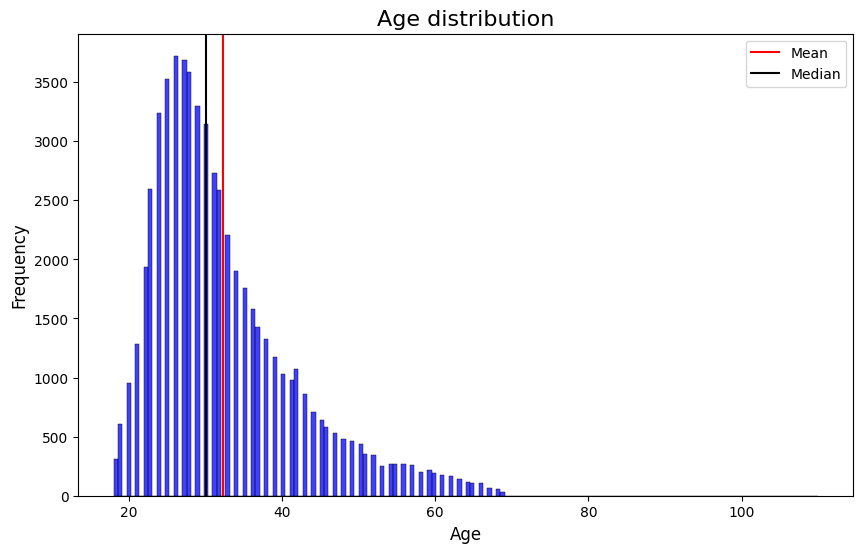

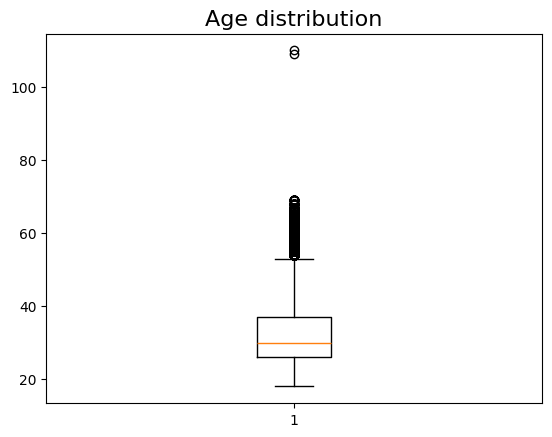

110


In [54]:
plt.figure(figsize = (10, 6))
sns.histplot(data_cleaned["age"], color = "blue")
plt.axvline(np.mean(data_cleaned["age"]), color = "red", label = "Mean")
plt.axvline(np.median(data_cleaned["age"]), color = "black", label = "Median")
plt.title("Age distribution", fontsize = 16)
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend()
plt.show()
plt.clf()

plt.boxplot(data_cleaned["age"])
plt.title("Age distribution", fontsize = 16)
plt.show()

print(max(data_cleaned["age"]))

Findings:
- The distribution is right-skewed.
- The majority of the users are found in the 26 to 37 age range (this is the IQR).
- There are two significant outliers, 110 and 109.

Since these two outliers can create issues when scaling the data later on, they need to be addressed.

In [55]:
display(data[(data["age"] == 110) | (data["age"] == 109)])

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,diet_strictness,has_kids,wants_kids,religion_type,religion_importance,sign_type,sign_importance,has_pets,likes_pets,dislikes_pets
2512,110,undisclosed,not disclosed,not disclosed,not disclosed,not disclosed,unknown,67.0,-1,not disclosed,...,undisclosed,No,not disclosed,not disclosed,not disclosed,not disclosed,not disclosed,not disclosed,not disclosed,not disclosed
25324,109,sporty,mostly other,not disclosed,never,working on masters program,unknown,68.0,-1,student,...,somewhat strict,No,might want them/might want more,other,somewhat serious about it,aquarius,doesn't matter,not disclosed,not disclosed,not disclosed


Looking at the raws of the uncleaned data, we can see that the user who reported an age of 110 didn't provide any information in the majority of the other fields. With practically almost all the features having a value "not disclosed", this row of data doesn't really provide a lot of information. This could be a fake profile or someone lying about their age to use the dating site, so we'll get rid of it. We also choose not to fix it because, without practically any information about the user, it's not really possible to get a sense of their age.<br><br>
The user who reported 109 years of age did fill most of the other fields, so we could assume that the age was a typo. Also, given that it's only one row, altering the age value won't have a massive impact. As for how to fix the age value:
- The user's specific location (before assigning a general region) was California and he reports smoking, so, given the minimum legal age to smoke in that state, we can assume they're at least 21 years old.
- The user is also working on a master's degree program, so he's a student.
- With these characteristics, we can already get a sense of what the user's age range might be.
- We'll look at other users with similar characteristics and get an average age for people who share those traits.
- Then, we'll assign that age to the 109 year old user.

In [56]:
# average age of students working on a masters program
print(round(np.mean(data["age"][data["education"] == "working on masters program"])))

30


Knowing that the average age of students working on a masters program is 30, we can assign this value to the user. This is also consistent with being at least 21 years of age.

In [57]:
# dropping the user that reports being 110 years old
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned["age"] == 110].index).reset_index(drop = True)

# fixing the age value for the user that reports being 109 years old
data_cleaned.loc[data_cleaned[data_cleaned["age"] == 109].index, "age"] = 30
print(data_cleaned["age"].max())

69


Visualizing the age distribution after the fixes

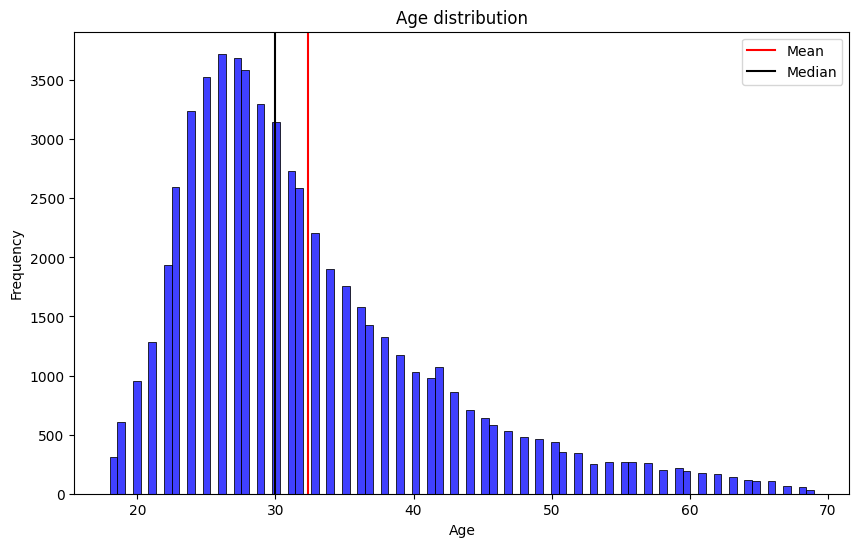

<Figure size 640x480 with 0 Axes>

In [58]:
plt.figure(figsize = (10, 6))
sns.histplot(data_cleaned["age"], color = "blue")
plt.axvline(np.mean(data_cleaned["age"]), color = "red", label = "Mean")
plt.axvline(np.median(data_cleaned["age"]), color = "black", label = "Median")
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.clf()

The distribution is still right-skewed, but now the outliers have been dealt with.

### Body type

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


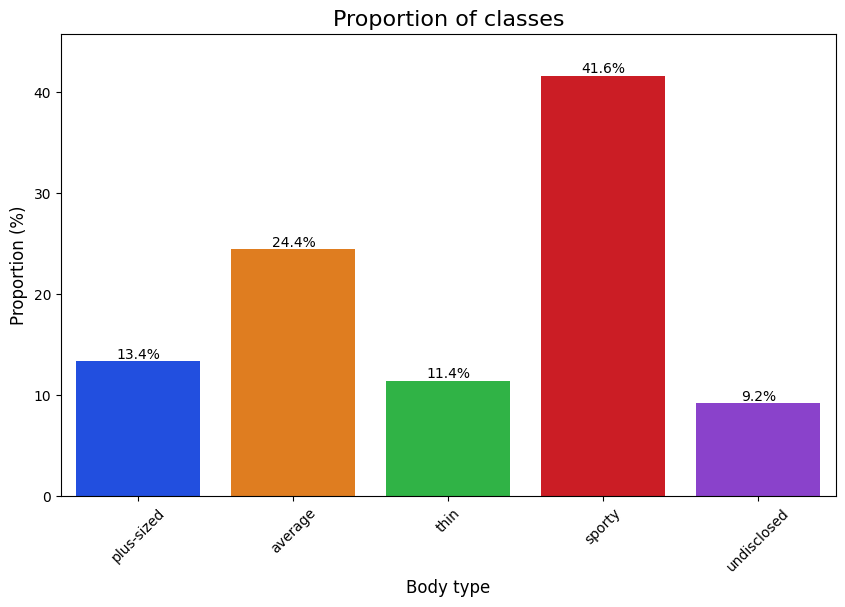

<Figure size 640x480 with 0 Axes>

In [59]:
util.create_count_plot(data_cleaned["body_type"], "Body type")

Findings:
- Most of the users in the platform fall in the "sporty" body type category (just over 40%).
- A second noticeable spike is in the "average" body type category, which represents around 25%.
- The other 3 categories are less pronounced, with undisclosed being the smallest.
- It's interesting that the "average" category is not really the norm in this sample.

### Drinks

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


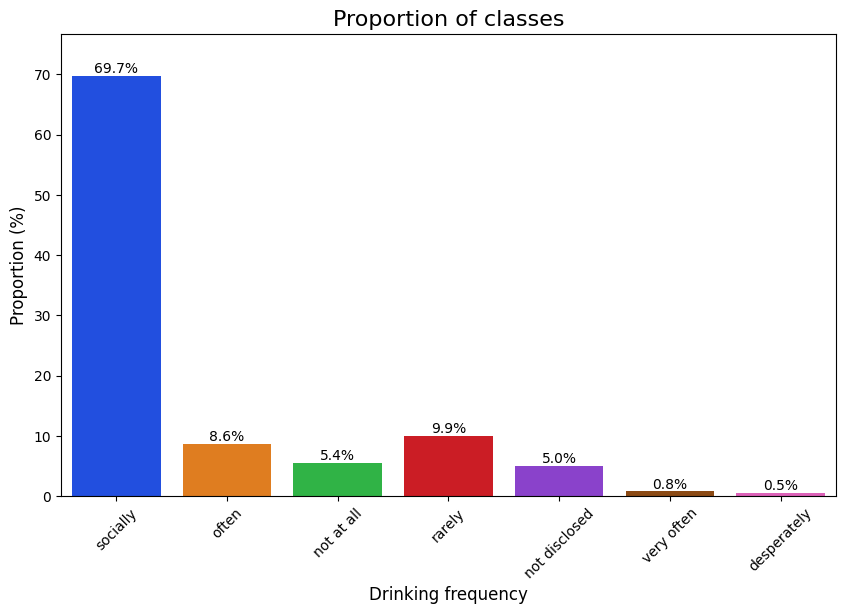

<Figure size 640x480 with 0 Axes>

In [60]:
util.create_count_plot(data_cleaned["drinks"], "Drinking frequency")

Findings:
- Almost 70% of the users are social drinkers.
- Around an additional 20% of users fall within the "rarely" or "often" classes.
- The remaining 10% is made up by those who either drink a lot, don't drink at all, or chose not to disclose that information.

### Drugs

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


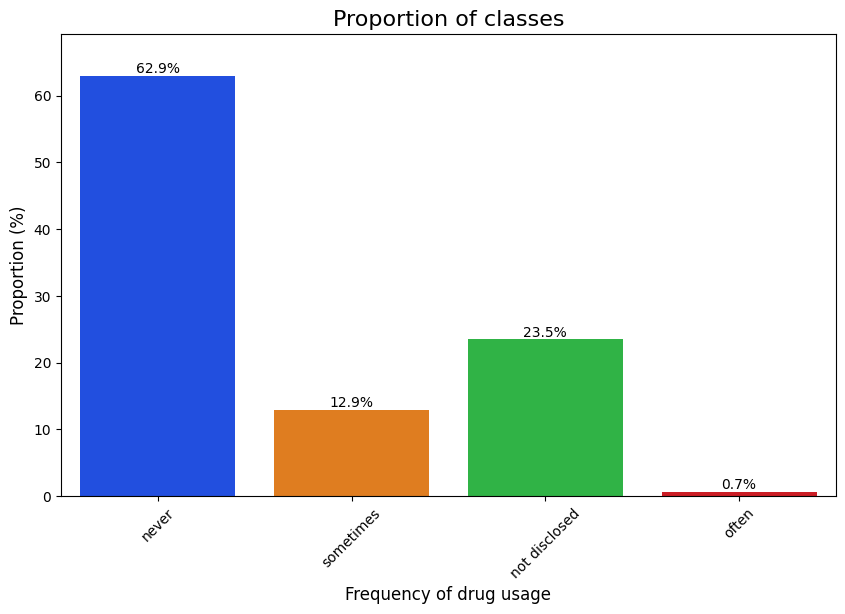

<Figure size 640x480 with 0 Axes>

In [61]:
util.create_count_plot(data_cleaned["drugs"], "Frequency of drug usage")

Findings:
- The majority of users report never using drugs (more than 60%).
- Around 25% of users prefer not to disclose this information.
- The remainder of the users (around 15%) do use drugs.

### Ethinicity

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


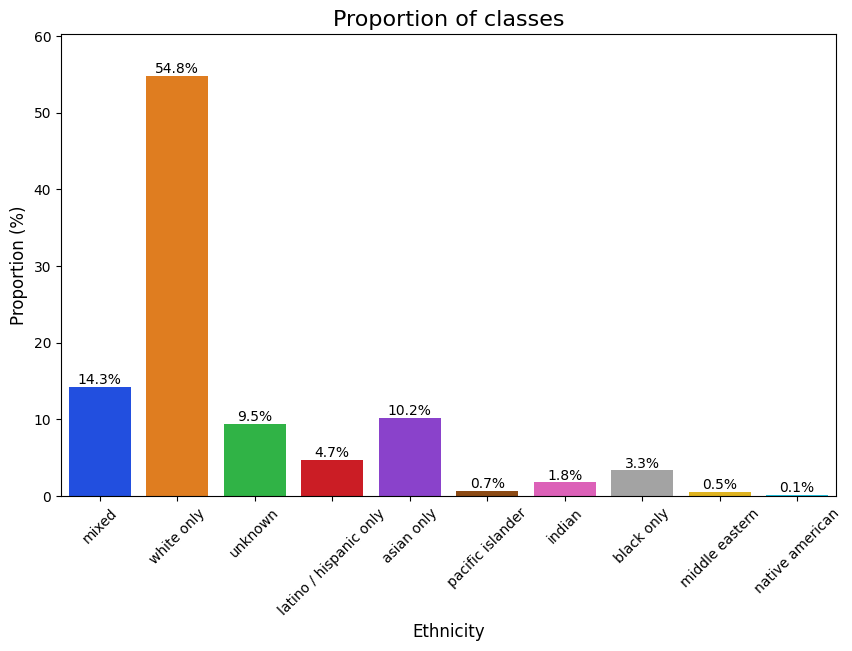

<Figure size 640x480 with 0 Axes>

In [62]:
util.create_count_plot(data_cleaned["ethnicity"], "Ethnicity")

Findings:
- The majority of the site's users are exclusively white.
- There is a significant proportion of users that are of mixed ethinicity (near 15%).
- Two other groups that stand out at around 10% each are exclusively asian users and those of unkown ethinicity.
- The rest of ethnicities are minorities at less than 5% each.

### Height

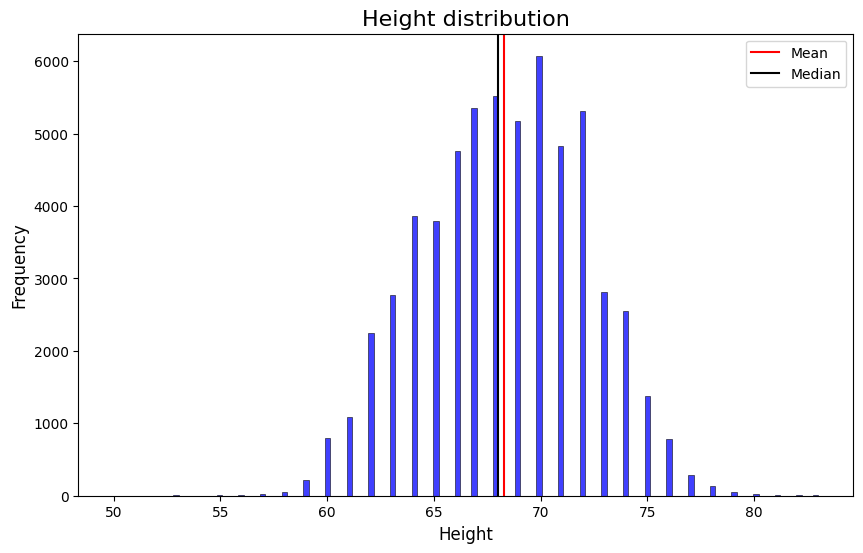

<Figure size 640x480 with 0 Axes>

In [63]:
plt.figure(figsize = (10, 6))
sns.histplot(x = data_cleaned["height"], color = "blue")
plt.axvline(np.mean(data_cleaned["height"]), color = "red", label = "Mean")
plt.axvline(np.median(data_cleaned["height"]), color = "black", label = "Median")
plt.title("Height distribution", fontsize = 16)
plt.xlabel("Height", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend()
plt.show()
plt.clf()

Findings:
- User height appears to be normally distributed.
- Since outliers were addressed previously in the "Feature Engineering" section, there are no anomalies.

### Location

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


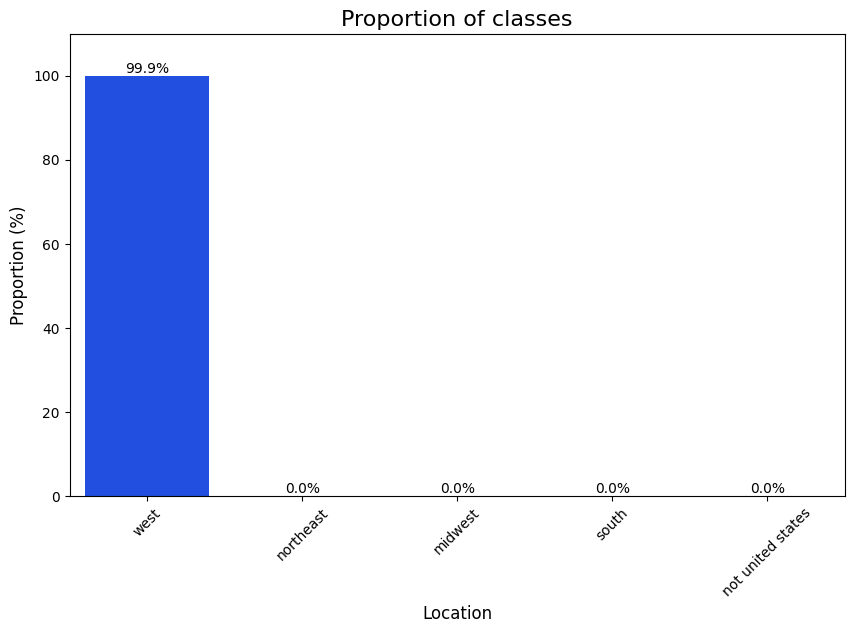

<Figure size 640x480 with 0 Axes>

In [64]:
util.create_count_plot(data_cleaned["location"], "Location")

In [65]:
print(data_cleaned["location"].value_counts(normalize = True))

location
west                 0.998782
northeast            0.000350
midwest              0.000300
south                0.000300
not united states    0.000267
Name: proportion, dtype: float64


Findings:
- Practically 99.9% of the users are located in the west region of the United States.
- This variable will most likely be useless, as there's essentially no variation to it.

### Orientation

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


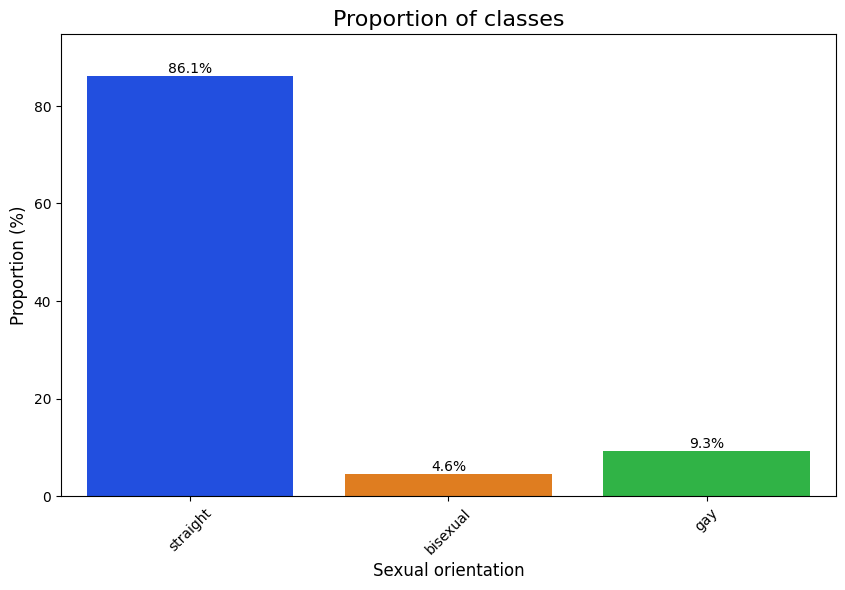

orientation
straight    0.860872
gay         0.092969
bisexual    0.046159
Name: proportion, dtype: float64


<Figure size 640x480 with 0 Axes>

In [66]:
util.create_count_plot(data_cleaned["orientation"], "Sexual orientation")
print(data_cleaned["orientation"].value_counts(normalize = True))

Findings:
- 86% of users are straigth, about 9% are gay, and a little more than 4.6% are bisexual.
- While the variable is clearly dominated by one of the classes, it might still offer valuable insight.

### Sex

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


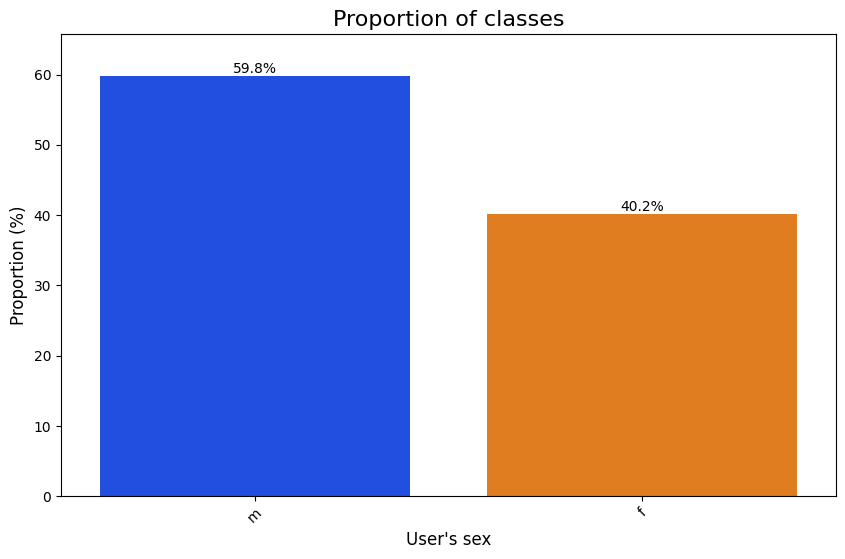

<Figure size 640x480 with 0 Axes>

In [67]:
util.create_count_plot(data_cleaned["sex"], "User's sex")

Findings:
- The users of the dating site are primarily male.

### Smokes

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


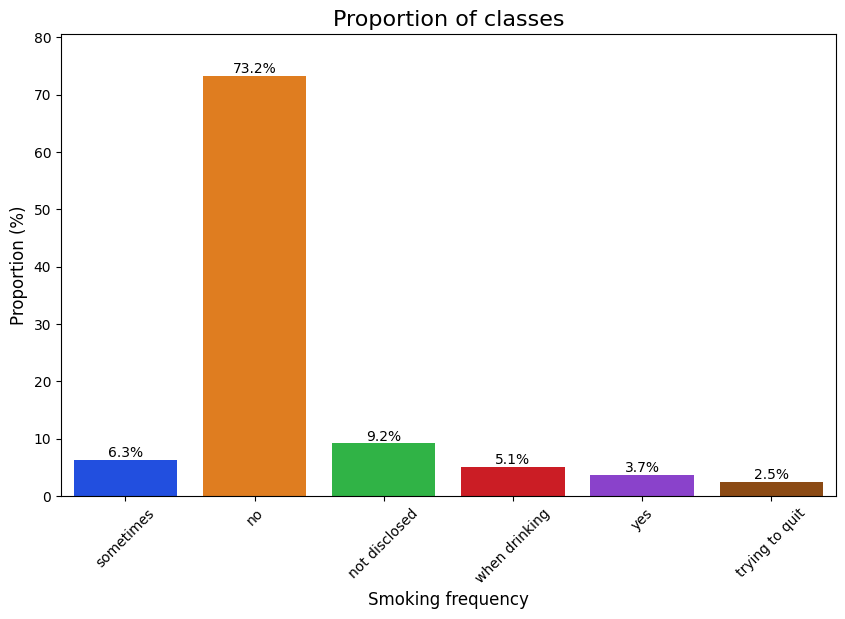

<Figure size 640x480 with 0 Axes>

In [68]:
util.create_count_plot(data_cleaned["smokes"], "Smoking frequency")

Findings:
- Most of the users are non-smokers (over 70%).
- The rest of the classes all represent less than 10% of the total dataset each.
- However, we can see that, if we group all smokers into a single category (ignoring the frequency with which they smoke), around 20% of users would fall here.

### Status

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


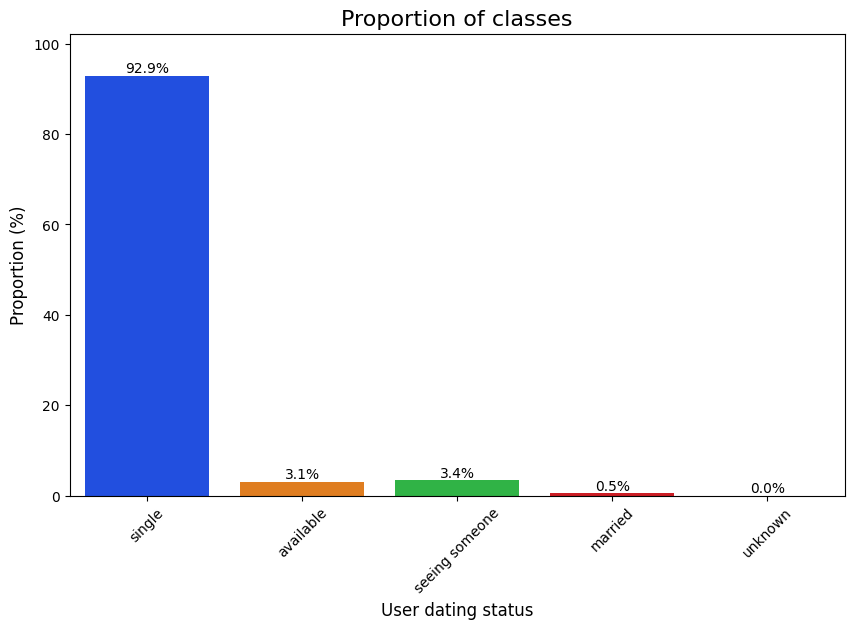

<Figure size 640x480 with 0 Axes>

In [69]:
util.create_count_plot(data_cleaned["status"], "User dating status")

Findings:
- As expected, the majority of the users in the website are single (almost 93%).
- What's surprising is to see users who are already seeing someone or even married, even if they represent a minority.
- Like with some of the other features, there's little to no variability here, so it probably won't offer much in terms of information about the user base.

### Number of languages

Even though this is a discrete variable, the limited number of values it can take makes it so that we can visualize it better with a countplot.

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


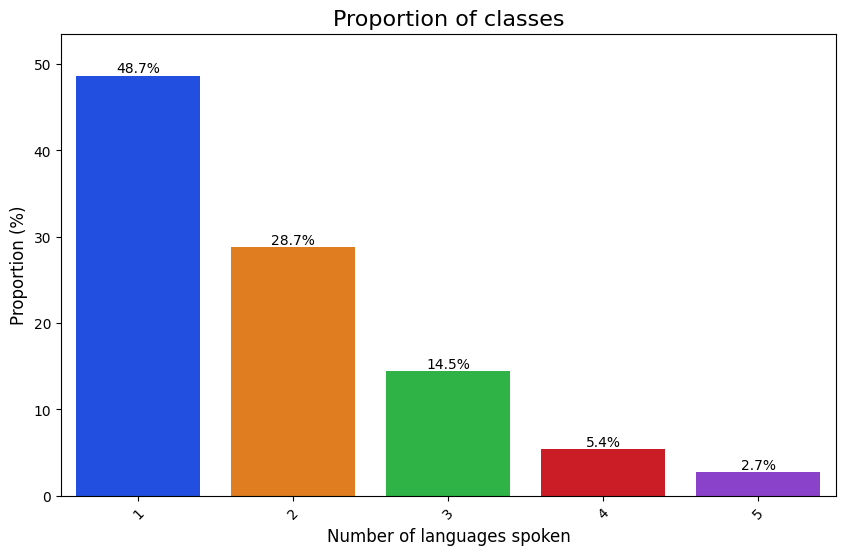

<Figure size 640x480 with 0 Axes>

In [70]:
util.create_count_plot(data_cleaned["num_languages"], "Number of languages spoken")

Findings:
- The majority of the users speak only one language (English).
- The proportion of users who speak 2 or 3 languages is definitely not negligible.
- Users speaking 4 or more languages are quite rare.

### Education

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


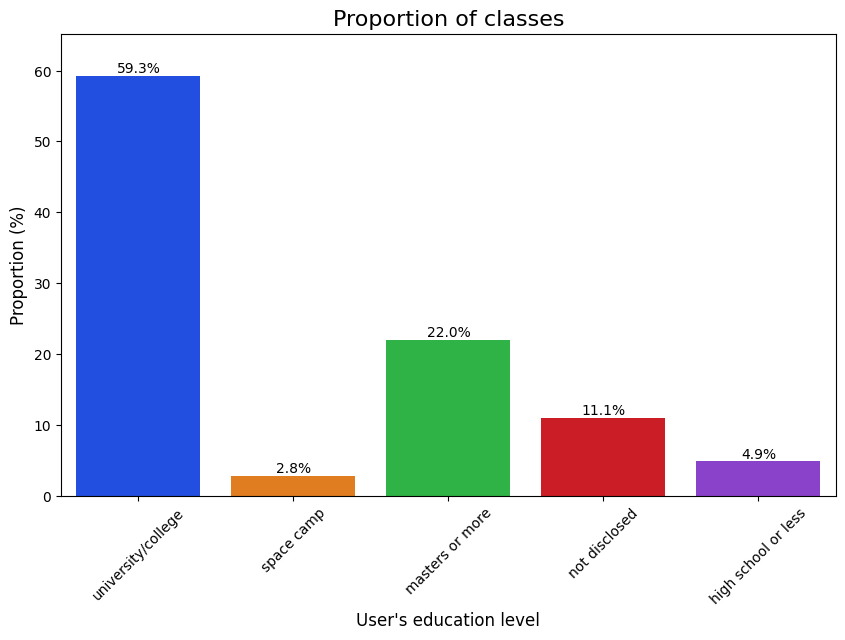

<Figure size 640x480 with 0 Axes>

In [71]:
util.create_count_plot(data_cleaned["education_group"], "User's education level")

Findings:
- The majority of users are either currently enrolled in or have completed at least university/college.
- This makes sense taking into consideration that the average age of our users is 30 years old.

### Job

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


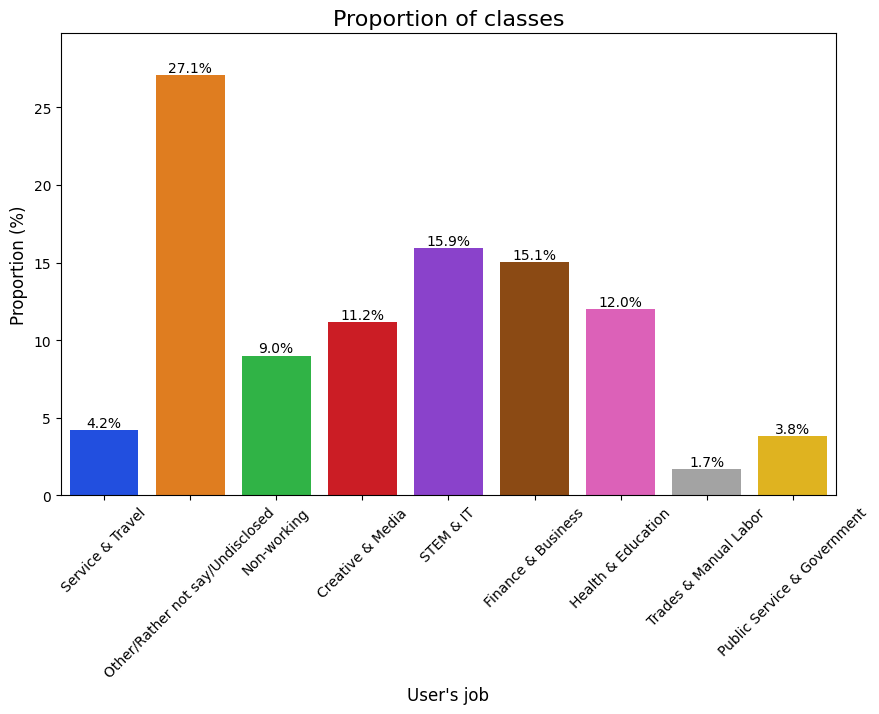

<Figure size 640x480 with 0 Axes>

In [72]:
util.create_count_plot(data_cleaned["job_group"], "User's job")

Findings:
- Surprisingly, the majority of the users prefer not to disclose what their job is.
- STEM & IT and Finance & Business are the two largest categories of people who did disclose their job.
- Users' jobs are not evenly distributed across the site, with some industries having very low representation.

### Diet

#### Diet type

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


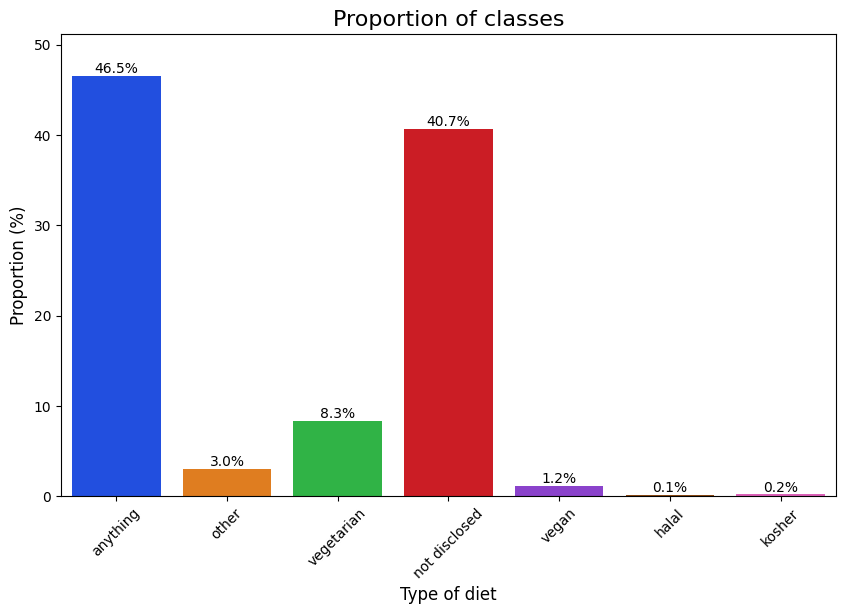

<Figure size 640x480 with 0 Axes>

In [73]:
util.create_count_plot(data_cleaned["diet_type"], "Type of diet")

Findings:
- Special diets seem to be minorities, although a very considerable portion of the users chose not to disclose their diet preferences.
- Out of all special diets included here, vegetarians are by far the most prevalent.

#### Diet strictness

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


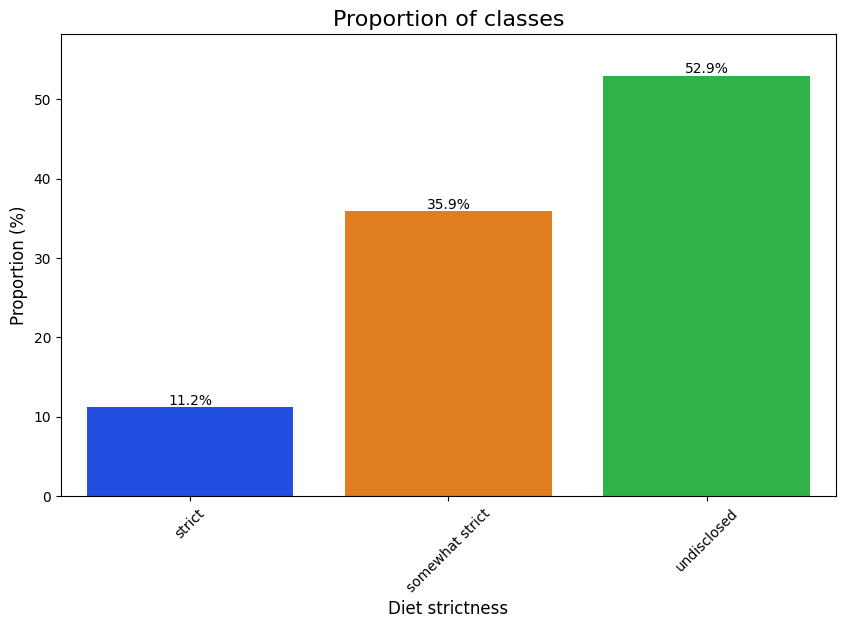

<Figure size 640x480 with 0 Axes>

In [74]:
util.create_count_plot(data_cleaned["diet_strictness"], "Diet strictness")

Findings:
- Most of the users don't seem to find it important to state how strict their diet is.
    - This could mean that they're simply not too strict about it.

### Kids

#### Having kids

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


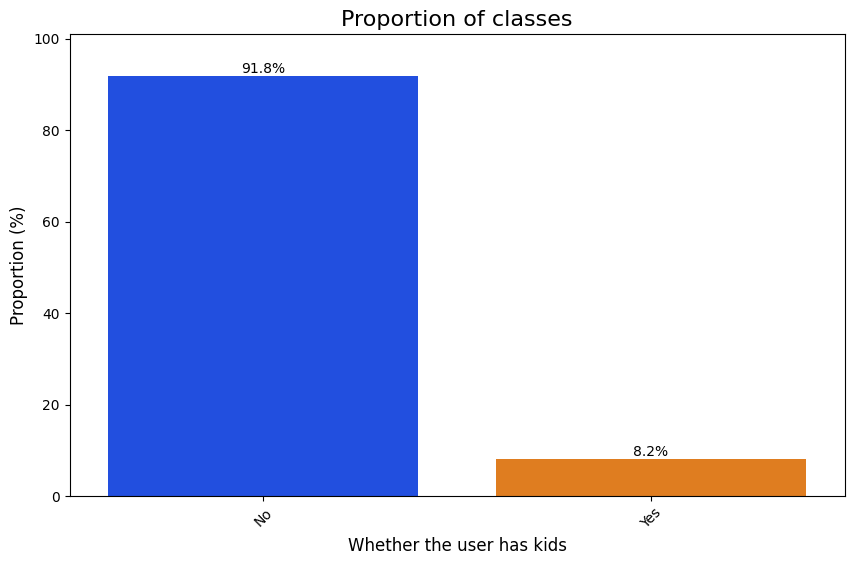

<Figure size 640x480 with 0 Axes>

In [75]:
util.create_count_plot(data_cleaned["has_kids"], "Whether the user has kids")

Findings:
- The majority of the users don't have kids

#### Wanting kids

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


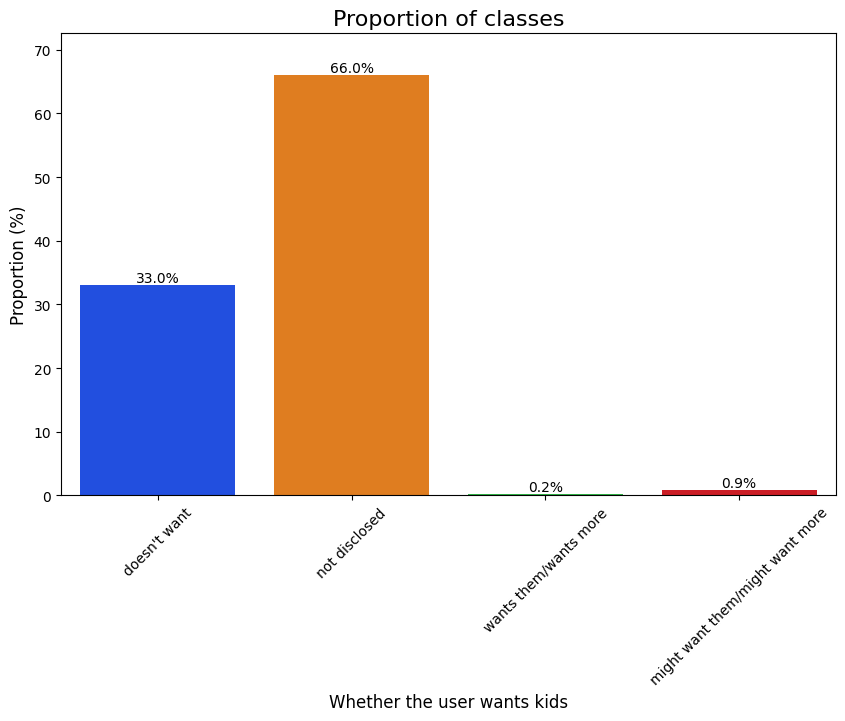

<Figure size 640x480 with 0 Axes>

In [76]:
util.create_count_plot(data_cleaned["wants_kids"], "Whether the user wants kids")

Findings:
- While the majority of the users didn't say whether they wanted to have kids at some point, out of those that did give out this information, the majority doesn't.
- Users who want them or might want them make up about 1.1% of all users.

### Religion

#### Religion type

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


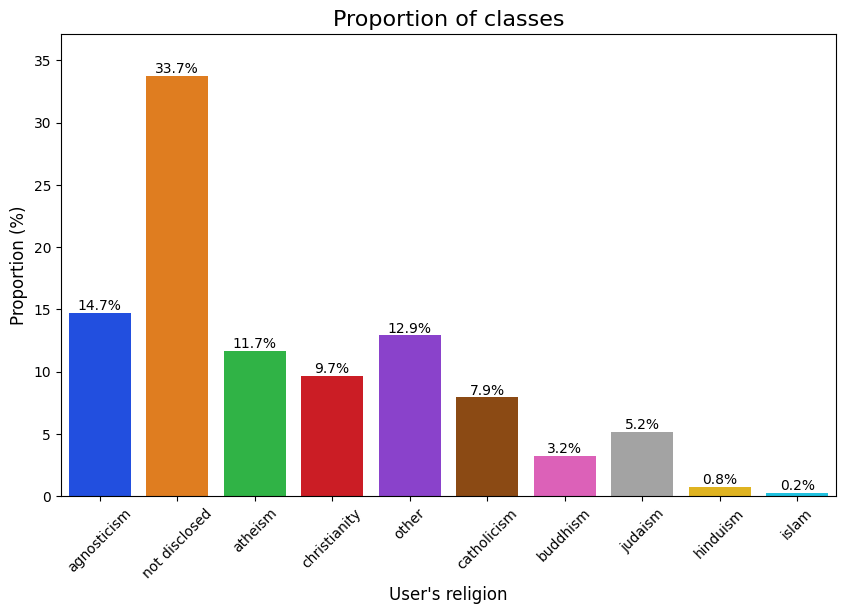

<Figure size 640x480 with 0 Axes>

In [77]:
util.create_count_plot(data_cleaned["religion_type"], "User's religion")

Findings:
- Most of the users chose not to disclose what they religion they believe in (if any).
- Out of those that did disclose it, agnostics, atheists, and "other" are the biggest groups.

#### Religion importance

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


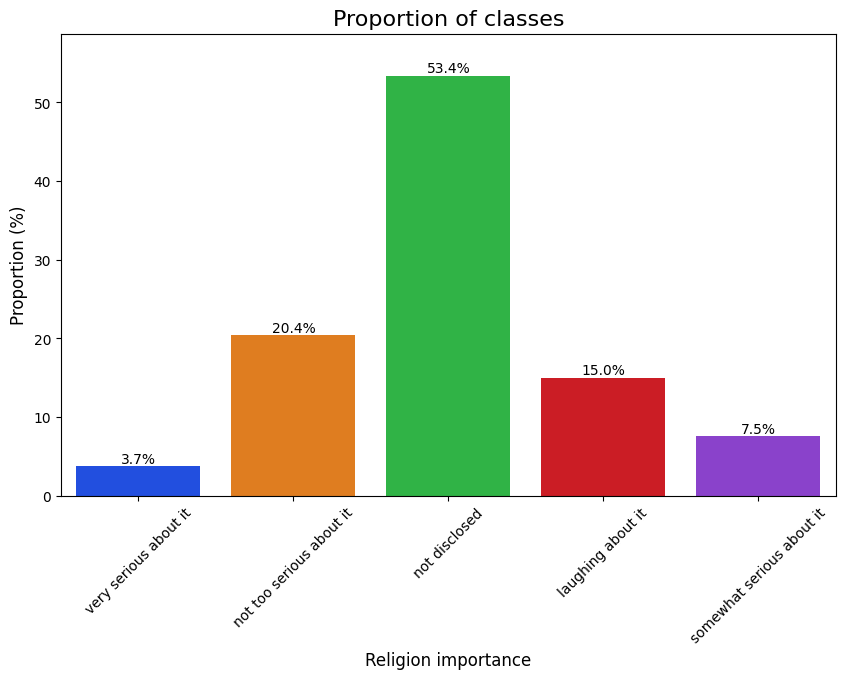

<Figure size 640x480 with 0 Axes>

In [78]:
util.create_count_plot(data_cleaned["religion_importance"], "Religion importance")

Findings:
- Again, the majority of the people didn't disclose the degree to which they hold their beliefs.
- Out of those who did, the majority don't take it too seriously.
- People who do consider religion a very important part of their lives represent less than 4% of all users.

### Star sign

#### Sign type

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


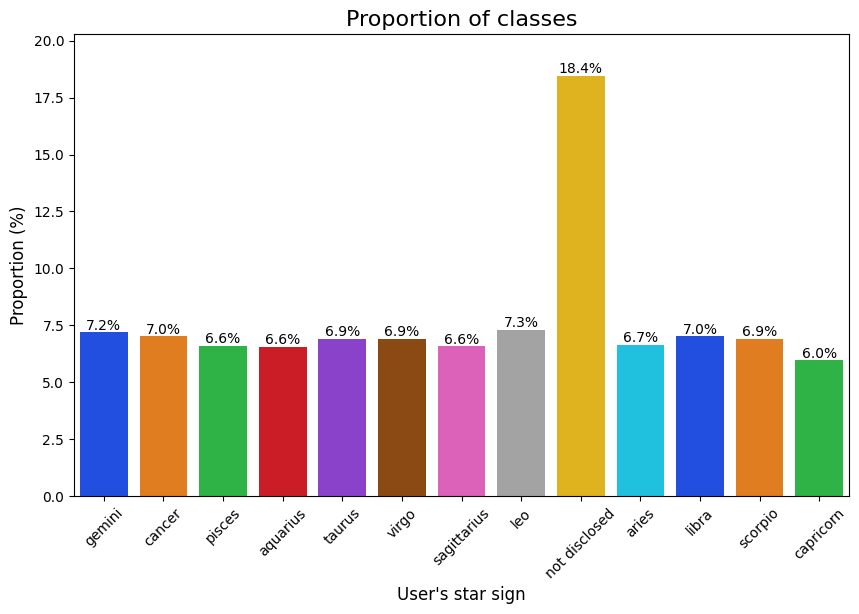

<Figure size 640x480 with 0 Axes>

In [79]:
util.create_count_plot(data_cleaned["sign_type"], "User's star sign")

Findings:
- Star signs are very evenly distributed, with each class representing around 6% or 7% of the total user base.
- A considerable portion of users didn't disclose this information, but, based on the pattern observed for the others, it would be fair to assume that they would also be distributed evenly.

#### Sign importance

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


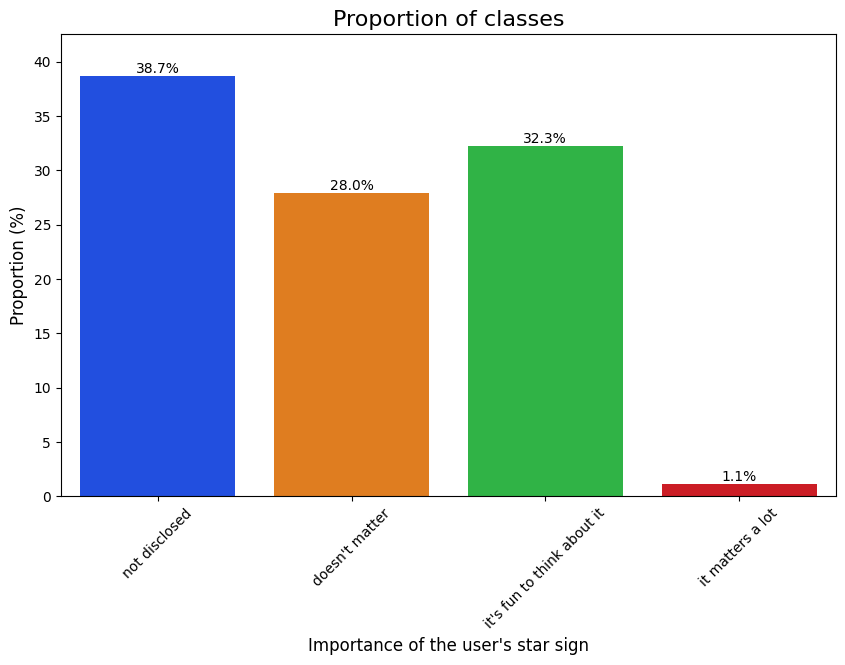

<Figure size 640x480 with 0 Axes>

In [80]:
util.create_count_plot(data_cleaned["sign_importance"], "Importance of the user's star sign")

Findings:
- As with religion, the majority of people either didn't disclose this information or believe it's not too important.

### Pets

#### Having pets

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


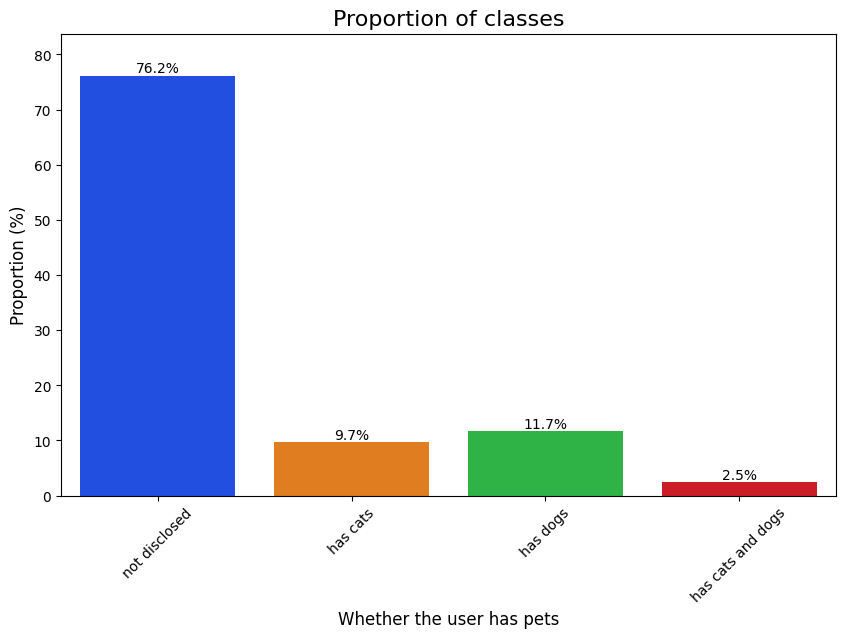

<Figure size 640x480 with 0 Axes>

In [81]:
util.create_count_plot(data_cleaned["has_pets"], "Whether the user has pets")

Findings:
- Most users didn't say whether they had pets or not.
- Out of those who did, cat owners and dog owners appear to be relatively evenly distributed.

#### Liking pets

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


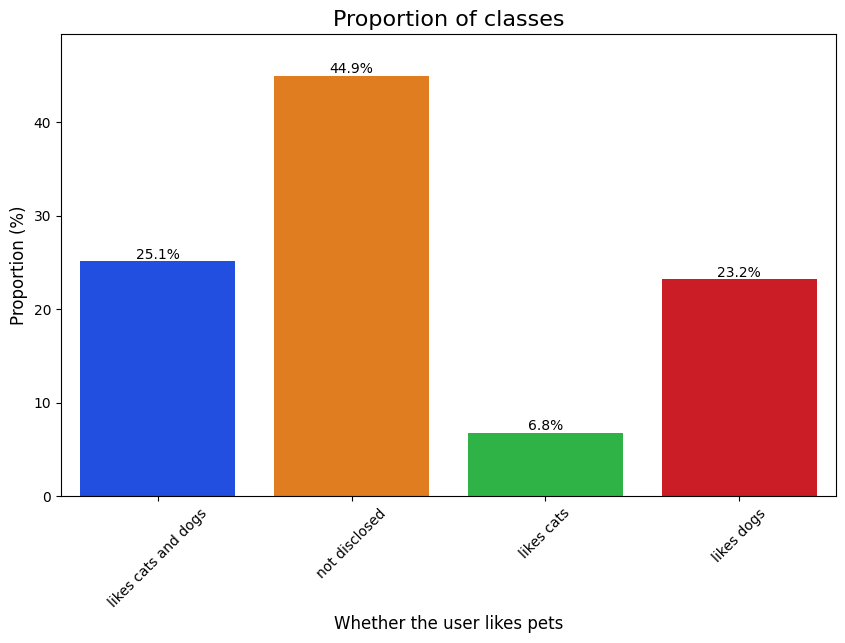

<Figure size 640x480 with 0 Axes>

In [82]:
util.create_count_plot(data_cleaned["likes_pets"], "Whether the user likes pets")

Findings:
- Despite cat and dog owners being relatively evenly distributed, there appers to be a stronger preference for dogs.

#### Disliking pets

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\2_okcupid\util.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


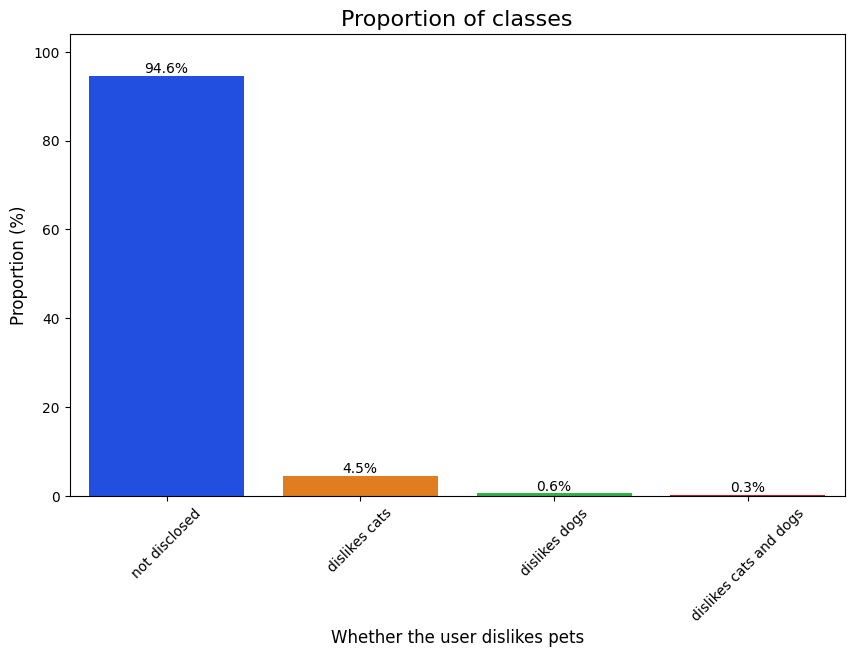

<Figure size 640x480 with 0 Axes>

In [83]:
util.create_count_plot(data_cleaned["dislikes_pets"], "Whether the user dislikes pets")

Findings:
- While there appears to be a stronger disliking towards cats, there is probably not enough information to draw any meaningful conclusions, as most of the users did not give out this information.

In [84]:
display(data_cleaned)

,age,body_type,drinks,drugs,ethnicity,height,location,orientation,sex,smokes,...,diet_strictness,has_kids,wants_kids,religion_type,religion_importance,sign_type,sign_importance,has_pets,likes_pets,dislikes_pets
0,22,plus-sized,socially,never,mixed,75.0,west,straight,m,sometimes,...,strict,No,doesn't want,agnosticism,very serious about it,gemini,not disclosed,not disclosed,likes cats and dogs,not disclosed
1,35,average,often,sometimes,white only,70.0,west,straight,m,no,...,somewhat strict,No,doesn't want,agnosticism,not too serious about it,cancer,not disclosed,not disclosed,likes cats and dogs,not disclosed
2,38,thin,socially,not disclosed,unknown,68.0,west,straight,m,no,...,undisclosed,No,not disclosed,not disclosed,not disclosed,pisces,doesn't matter,has cats,not disclosed,not disclosed
3,23,thin,socially,not disclosed,white only,71.0,west,straight,m,no,...,undisclosed,No,doesn't want,not disclosed,not disclosed,pisces,not disclosed,not disclosed,likes cats,not disclosed
4,29,sporty,socially,never,mixed,66.0,west,straight,m,no,...,undisclosed,No,not disclosed,not disclosed,not disclosed,aquarius,not disclosed,not disclosed,likes cats and dogs,not disclosed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59940,59,undisclosed,socially,never,unknown,62.0,west,straight,f,no,...,undisclosed,Yes,not disclosed,catholicism,not too serious about it,cancer,it's fun to think about it,has dogs,not disclosed,not disclosed
59941,24,sporty,often,sometimes,mixed,72.0,west,straight,m,no,...,somewhat strict,No,doesn't want,agnosticism,not disclosed,leo,doesn't matter,not disclosed,likes cats and dogs,not disclosed
59942,42,average,not at all,never,asian only,71.0,west,straight,m,no,...,somewhat strict,No,doesn't want,christianity,not too serious about it,sagittarius,doesn't matter,not disclosed,not disclosed,not disclosed
59943,27,sporty,socially,often,mixed,73.0,west,straight,m,trying to quit,...,somewhat strict,No,doesn't want,agnosticism,not too serious about it,leo,it's fun to think about it,not disclosed,likes cats and dogs,not disclosed


# Implementation of K-Prototypes Clustering

## Variable selection

Since there is no clear target variable, we'll start by simply trying to separate the users based on similar characteristics.<br><br>
For the implementation of the algorithm, we'll leave aside the features that don't really tell us a lot about the user's profile:
- height
- income_imputed
- income_disclosed
- ethnicity
- location
    - Due to the practically non-existent variability

In [85]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder, StandardScaler

# isolate the features we're interested in using
X_kprot = data_cleaned.drop(["height", "income_imputed", "income_disclosed", 
                             "ethnicity", "location"], axis = 1)

# check what the data frame looks like with only the relevant features
print(X_kprot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59945 entries, 0 to 59944
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  59945 non-null  int64 
 1   body_type            59945 non-null  object
 2   drinks               59945 non-null  object
 3   drugs                59945 non-null  object
 4   orientation          59945 non-null  object
 5   sex                  59945 non-null  object
 6   smokes               59945 non-null  object
 7   status               59945 non-null  object
 8   num_languages        59945 non-null  int64 
 9   education_group      59945 non-null  object
 10  job_group            59945 non-null  object
 11  diet_type            59945 non-null  object
 12  diet_strictness      59945 non-null  object
 13  has_kids             59945 non-null  object
 14  wants_kids           59945 non-null  object
 15  religion_type        59945 non-null  object
 16  reli

In [147]:
# column indices of categorical and numerical variables
cat_cols = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
num_cols = [0, 8]

# standardize the numerical features
scaler = StandardScaler()

for ind in num_cols:
    X_kprot[X_kprot.columns[ind]] = scaler.fit_transform(np.array(X_kprot[X_kprot.columns[ind]]).reshape(-1, 1))

# encode the categorical features as integers
encoder = LabelEncoder()

for ind in cat_cols:
    X_kprot[X_kprot.columns[ind]] = encoder.fit_transform(X_kprot[X_kprot.columns[ind]])

display(X_kprot)

,age,body_type,drinks,drugs,orientation,sex,smokes,status,num_languages,education_group,...,diet_strictness,has_kids,wants_kids,religion_type,religion_importance,sign_type,sign_importance,has_pets,likes_pets,dislikes_pets
0,-1.094829,1,5,0,2,1,2,3,-0.819598,4,...,1,0,0,0,4,4,3,3,1,3
1,0.281958,0,3,3,2,1,0,3,1.113734,3,...,0,0,0,0,2,2,3,3,1,3
2,0.599678,3,5,1,2,1,0,0,0.147068,1,...,2,0,2,8,1,8,0,0,3,3
3,-0.988923,3,5,1,2,1,0,3,0.147068,4,...,2,0,0,8,1,8,3,3,0,3
4,-0.353482,2,5,0,2,1,0,3,-0.819598,4,...,2,0,2,8,1,0,3,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59940,2.823720,4,5,0,2,0,0,3,-0.819598,4,...,2,1,2,3,2,2,2,2,3,3
59941,-0.883016,2,3,3,2,1,0,3,-0.819598,4,...,0,0,0,0,1,5,0,3,1,3
59942,1.023305,0,1,0,2,1,0,3,-0.819598,1,...,0,0,0,4,2,9,0,3,3,3
59943,-0.565296,2,5,2,2,1,3,3,3.047066,4,...,0,0,0,0,2,5,2,3,1,3


In [148]:
print(X_kprot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59945 entries, 0 to 59944
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  59945 non-null  float64
 1   body_type            59945 non-null  int64  
 2   drinks               59945 non-null  int64  
 3   drugs                59945 non-null  int64  
 4   orientation          59945 non-null  int64  
 5   sex                  59945 non-null  int64  
 6   smokes               59945 non-null  int64  
 7   status               59945 non-null  int64  
 8   num_languages        59945 non-null  float64
 9   education_group      59945 non-null  int64  
 10  job_group            59945 non-null  int64  
 11  diet_type            59945 non-null  int64  
 12  diet_strictness      59945 non-null  int64  
 13  has_kids             59945 non-null  int64  
 14  wants_kids           59945 non-null  int64  
 15  religion_type        59945 non-null 

## Hyperparameter tuning

### Tuning the number of clusters

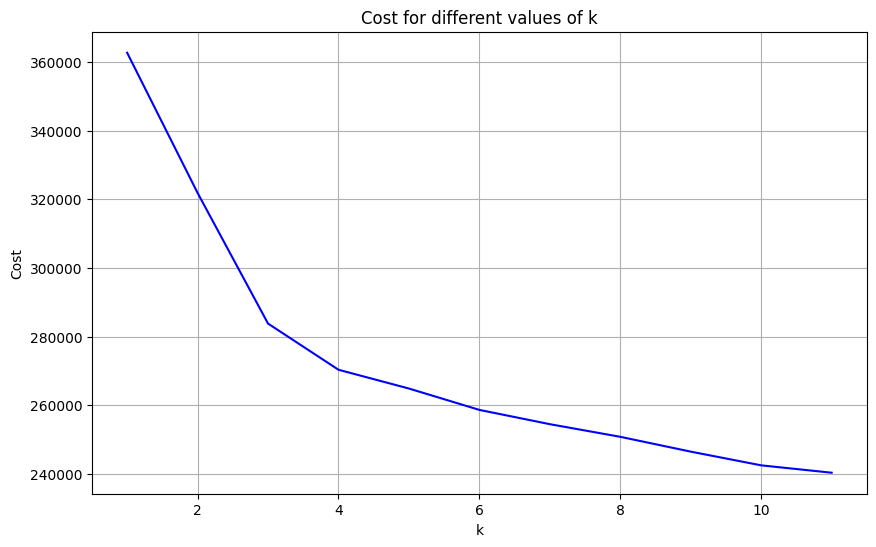

In [149]:
# elbow method using the cost value
k_values = range(1, 12)
costs = []

for k in k_values:
    clusterer = KPrototypes(n_clusters = k, init = "Cao", 
                                n_init = 3, random_state = 10)
    clusterer.fit(X_kprot, categorical = cat_cols)
    costs.append(clusterer.cost_)

plt.figure(figsize = (10, 6))
plt.grid(True)
sns.lineplot(x = k_values, y = costs, color = "blue")
plt.title("Cost for different values of k")
plt.xlabel("k")
plt.ylabel("Cost")
plt.show()

Analyzing the graph, the point at which cost appears to start diminishing more linearly is after k = 4

### Tuning gamma

Since there is a huge imbalance in terms of the number of categorical vs numerical features, it's probably a good idea to include a value for gamma instead of the default None.

In [150]:
# tuning gamma
gammas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5]

for g in gammas:
    clusterer = KPrototypes(n_clusters = 4, init = "Cao", 
                                n_init = 3, random_state = 10, gamma = g)
    clusterer.fit(X_kprot, categorical = cat_cols)
    unique_counts = pd.DataFrame(clusterer.cluster_centroids_).nunique().sum()
    print("Gamma: {} | Total unique traits across clusters: {}".format(g, unique_counts))

Gamma: 0 | Total unique traits across clusters: 31
Gamma: 0.1 | Total unique traits across clusters: 31
Gamma: 0.2 | Total unique traits across clusters: 31
Gamma: 0.3 | Total unique traits across clusters: 32
Gamma: 0.4 | Total unique traits across clusters: 40
Gamma: 0.5 | Total unique traits across clusters: 40
Gamma: 0.6 | Total unique traits across clusters: 40
Gamma: 0.7 | Total unique traits across clusters: 40
Gamma: 0.8 | Total unique traits across clusters: 40
Gamma: 0.9 | Total unique traits across clusters: 40
Gamma: 1 | Total unique traits across clusters: 40
Gamma: 5 | Total unique traits across clusters: 48


The results obtained from the tuning process of gamma yielded two interesting results:
- Gamma values up to 1.
    - The number of unique traits across clusters increases up to gamma = 0.4.
    - After this, the total number of unique traits stabilizes until gamma = 1.
- Gamma value of 5.
    - The total number of unique traits increases to 48.
    - The significant increase in the number of unique traits across clusters could imply that either we overcame a local minimum present at lower gamma values (keep in mind almost all variables are categorical) or that the model is now overfitting the data.
    - It's worth exploring how the model performs at higher gamma values to see if these results are useful or not.

### Checking cluster quality

Having determined the optimal value for k (4), we'll see how clusters are defined at higher values of gamma in multiple iterations without setting a fixed random state to measure the sensitivity of the clusters being formed. The idea here is to test whether the results at gamma = 5 are reproducible or whether what we saw previously was the result of that specific random state.

In [151]:
# test the model with gamma = 5 and without a fixed random state
largest = []
second_largest = []
third_largest = []
fourth_largest = []

for i in range(20):
    # fitting the model
    model = KPrototypes(n_clusters = 4, 
                        init = "Cao",
                        n_init = 3,
                        gamma = 5)
    model.fit(X_kprot, categorical = cat_cols)

    # predicting cluster labels
    labels = pd.Series(model.predict(X_kprot, categorical = cat_cols))
    sorted_labels = sorted(labels.value_counts(normalize = True), reverse = True)

    # storing cluster proportion relative to the entire population
    largest.append(sorted_labels[0])
    second_largest.append(sorted_labels[1])
    third_largest.append(sorted_labels[2])
    fourth_largest.append(sorted_labels[3])

print("Average proportion of the largest cluster: {}".format(np.mean(largest)))
print("Average proportion of the second largest cluster: {}".format(np.mean(second_largest)))
print("Average proportion of the third largest cluster: {}".format(np.mean(third_largest)))
print("Average proportion of the fourth largest cluster: {}".format(np.mean(fourth_largest)))

Average proportion of the largest cluster: 0.5095637667862207
Average proportion of the second largest cluster: 0.23380265243139542
Average proportion of the third largest cluster: 0.16297689548753022
Average proportion of the fourth largest cluster: 0.09365668529485362


After running the loop, we see that the largest cluster represents on average about 51% of the data, and the smallest cluster around 9.3% on average.<br><br>
We can double-check the strength of these results by also examining the standard deviation for each list.

In [152]:
print("Std. Deviation of the largest cluster: {}".format(np.std(largest)))
print("Std. Deviation of the second largest cluster: {}".format(np.std(second_largest)))
print("Std. Deviation of the third largest cluster: {}".format(np.std(third_largest)))
print("Std. Deviation of the fourth largest cluster: {}".format(np.std(fourth_largest)))

Std. Deviation of the largest cluster: 0.013460952931364949
Std. Deviation of the second largest cluster: 0.006823875568206561
Std. Deviation of the third largest cluster: 0.009804870258978159
Std. Deviation of the fourth largest cluster: 0.014872203027556171


With the standard deviations for each cluster being quite low, we can confidently say that they are not due to randomness.<br><br>
Now, it is clear that having a cluster with more than 50% of users in it is quite skewed. However, this does align with what was discovered during the EDA phase, as we've seen that many of the features included here have little variation between classes, with one dominant class in almost all situations. Therefore, it would make sense to have a group that's larger than the rest, representing these class imbalances in the way we segment users.

## Fitting the definitive model

With the information gathered from the hyperparameter tuning phase, we know that our model should have 4 clusters and a gamma value of 5.<br><br>
With this information, we can proceed to fit the definitive model we'll use to classify the users of the site.

In [153]:
# fitting the definitive model
kprot_clusterer = KPrototypes(n_clusters = 4, init = "Cao", 
                              n_init = 10, gamma = 5, random_state = 42)
kprot_clusterer.fit(X_kprot, categorical = cat_cols)

labels = kprot_clusterer.predict(X_kprot, categorical = cat_cols)

In [154]:
# checking what variables provide differentiation for the clusters
categorical_columns = X_kprot.columns[cat_cols].tolist()
numerical_columns = X_kprot.columns[num_cols].tolist()
centroid_columns = numerical_columns + categorical_columns

centroid_df = pd.DataFrame(data = kprot_clusterer.cluster_centroids_, columns = centroid_columns)

for col in centroid_df.columns:
    print("Number of unique values: {} | Feature: {}".format(centroid_df[col].nunique(), col))

Number of unique values: 4 | Feature: age
Number of unique values: 4 | Feature: num_languages
Number of unique values: 3 | Feature: body_type
Number of unique values: 1 | Feature: drinks
Number of unique values: 1 | Feature: drugs
Number of unique values: 1 | Feature: orientation
Number of unique values: 2 | Feature: sex
Number of unique values: 1 | Feature: smokes
Number of unique values: 1 | Feature: status
Number of unique values: 1 | Feature: education_group
Number of unique values: 3 | Feature: job_group
Number of unique values: 2 | Feature: diet_type
Number of unique values: 2 | Feature: diet_strictness
Number of unique values: 1 | Feature: has_kids
Number of unique values: 2 | Feature: wants_kids
Number of unique values: 4 | Feature: religion_type
Number of unique values: 3 | Feature: religion_importance
Number of unique values: 4 | Feature: sign_type
Number of unique values: 3 | Feature: sign_importance
Number of unique values: 2 | Feature: has_pets
Number of unique values: 3 |

In [155]:
# adding the cluster labels to the original df
data_cleaned["cluster"] = labels
display(data_cleaned)

,age,body_type,drinks,drugs,ethnicity,height,location,orientation,sex,smokes,...,has_kids,wants_kids,religion_type,religion_importance,sign_type,sign_importance,has_pets,likes_pets,dislikes_pets,cluster
0,22,plus-sized,socially,never,mixed,75.0,west,straight,m,sometimes,...,No,doesn't want,agnosticism,very serious about it,gemini,not disclosed,not disclosed,likes cats and dogs,not disclosed,1
1,35,average,often,sometimes,white only,70.0,west,straight,m,no,...,No,doesn't want,agnosticism,not too serious about it,cancer,not disclosed,not disclosed,likes cats and dogs,not disclosed,1
2,38,thin,socially,not disclosed,unknown,68.0,west,straight,m,no,...,No,not disclosed,not disclosed,not disclosed,pisces,doesn't matter,has cats,not disclosed,not disclosed,0
3,23,thin,socially,not disclosed,white only,71.0,west,straight,m,no,...,No,doesn't want,not disclosed,not disclosed,pisces,not disclosed,not disclosed,likes cats,not disclosed,0
4,29,sporty,socially,never,mixed,66.0,west,straight,m,no,...,No,not disclosed,not disclosed,not disclosed,aquarius,not disclosed,not disclosed,likes cats and dogs,not disclosed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59940,59,undisclosed,socially,never,unknown,62.0,west,straight,f,no,...,Yes,not disclosed,catholicism,not too serious about it,cancer,it's fun to think about it,has dogs,not disclosed,not disclosed,3
59941,24,sporty,often,sometimes,mixed,72.0,west,straight,m,no,...,No,doesn't want,agnosticism,not disclosed,leo,doesn't matter,not disclosed,likes cats and dogs,not disclosed,1
59942,42,average,not at all,never,asian only,71.0,west,straight,m,no,...,No,doesn't want,christianity,not too serious about it,sagittarius,doesn't matter,not disclosed,not disclosed,not disclosed,1
59943,27,sporty,socially,often,mixed,73.0,west,straight,m,trying to quit,...,No,doesn't want,agnosticism,not too serious about it,leo,it's fun to think about it,not disclosed,likes cats and dogs,not disclosed,1


## Reversing transformations

In [156]:
kprot_results = pd.DataFrame()
kprot_results["cluster"] = labels

for col in X_kprot.columns:
    if (data_cleaned[col].dtype == int) or (data_cleaned[col].dtype == float):
        # fit the scaler with the data for the column to reverse
        temp_scaler = StandardScaler()
        temp_scaler = temp_scaler.fit(np.array(data_cleaned[col]).reshape(-1, 1))

        # reverse the data to its original scale
        reversed_var = temp_scaler.inverse_transform(np.array(X_kprot[col]).reshape(-1, 1))

        # save the reversed data to the results df
        lst = []
        for i in range(len(reversed_var)):
            lst.append(reversed_var[i][0])

        kprot_results[col] = lst

    else:
        # fit the encoder with the data for the column to reverse
        temp_encoder = LabelEncoder()
        temp_encoder = temp_encoder.fit(data_cleaned[col])

        # reverse the data to its original scale
        reversed_label = temp_encoder.inverse_transform(X_kprot[col])

        # save the reserved labels to the results df
        kprot_results[col] = reversed_label

    
display(kprot_results)

,cluster,age,body_type,drinks,drugs,orientation,sex,smokes,status,num_languages,...,diet_strictness,has_kids,wants_kids,religion_type,religion_importance,sign_type,sign_importance,has_pets,likes_pets,dislikes_pets
0,1,22.0,plus-sized,socially,never,straight,m,sometimes,single,1.0,...,strict,No,doesn't want,agnosticism,very serious about it,gemini,not disclosed,not disclosed,likes cats and dogs,not disclosed
1,1,35.0,average,often,sometimes,straight,m,no,single,3.0,...,somewhat strict,No,doesn't want,agnosticism,not too serious about it,cancer,not disclosed,not disclosed,likes cats and dogs,not disclosed
2,0,38.0,thin,socially,not disclosed,straight,m,no,available,2.0,...,undisclosed,No,not disclosed,not disclosed,not disclosed,pisces,doesn't matter,has cats,not disclosed,not disclosed
3,0,23.0,thin,socially,not disclosed,straight,m,no,single,2.0,...,undisclosed,No,doesn't want,not disclosed,not disclosed,pisces,not disclosed,not disclosed,likes cats,not disclosed
4,0,29.0,sporty,socially,never,straight,m,no,single,1.0,...,undisclosed,No,not disclosed,not disclosed,not disclosed,aquarius,not disclosed,not disclosed,likes cats and dogs,not disclosed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59940,3,59.0,undisclosed,socially,never,straight,f,no,single,1.0,...,undisclosed,Yes,not disclosed,catholicism,not too serious about it,cancer,it's fun to think about it,has dogs,not disclosed,not disclosed
59941,1,24.0,sporty,often,sometimes,straight,m,no,single,1.0,...,somewhat strict,No,doesn't want,agnosticism,not disclosed,leo,doesn't matter,not disclosed,likes cats and dogs,not disclosed
59942,1,42.0,average,not at all,never,straight,m,no,single,1.0,...,somewhat strict,No,doesn't want,christianity,not too serious about it,sagittarius,doesn't matter,not disclosed,not disclosed,not disclosed
59943,1,27.0,sporty,socially,often,straight,m,trying to quit,single,5.0,...,somewhat strict,No,doesn't want,agnosticism,not too serious about it,leo,it's fun to think about it,not disclosed,likes cats and dogs,not disclosed


## Fleshing out user profiles

With the users separated into 4 clusters, we can start investigating what sets each group apart. We'll start by checking our data frame with the information for each centroid to see where exactly we can find differences.

In [157]:
display(centroid_df)

,age,num_languages,body_type,drinks,drugs,orientation,sex,smokes,status,education_group,...,diet_strictness,has_kids,wants_kids,religion_type,religion_importance,sign_type,sign_importance,has_pets,likes_pets,dislikes_pets
0,-0.056984,-0.152137,2.0,5.0,0.0,2.0,1.0,0.0,3.0,4.0,...,2.0,0.0,2.0,8.0,1.0,7.0,3.0,3.0,3.0,3.0
1,-0.179365,0.213462,0.0,5.0,0.0,2.0,1.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,2.0,11.0,2.0,3.0,1.0,3.0
2,0.224947,0.198022,2.0,5.0,0.0,2.0,0.0,0.0,3.0,4.0,...,0.0,0.0,2.0,9.0,1.0,9.0,0.0,3.0,2.0,3.0
3,0.360762,-0.105189,1.0,5.0,0.0,2.0,0.0,0.0,3.0,4.0,...,2.0,0.0,0.0,3.0,0.0,12.0,0.0,0.0,2.0,3.0


In [158]:
### age
print(kprot_results.groupby("cluster")["age"].mean())
print("Global average: {}".format(np.mean(data_cleaned["age"])))

### num languages
print(kprot_results.groupby("cluster")["num_languages"].mean())
print("Global average: {}".format(np.mean(data_cleaned["num_languages"])))

### body type
print(kprot_results.groupby("cluster")["body_type"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["body_type"])))

### sex
print(kprot_results.groupby("cluster")["sex"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["sex"])))

### wants kids
print(kprot_results.groupby("cluster")["wants_kids"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["wants_kids"])))

### religion type
print(kprot_results.groupby("cluster")["religion_type"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["religion_type"])))

### religion importance
print(kprot_results.groupby("cluster")["religion_importance"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["religion_importance"])))

### job group
print(kprot_results.groupby("cluster")["job_group"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["job_group"])))

### diet type
print(kprot_results.groupby("cluster")["diet_type"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["diet_type"])))

### diet strictness
print(kprot_results.groupby("cluster")["diet_strictness"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["diet_strictness"])))

### sign type
print(kprot_results.groupby("cluster")["sign_type"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["sign_type"])))

### sign importance
print(kprot_results.groupby("cluster")["sign_importance"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["sign_importance"])))

### has pets
print(kprot_results.groupby("cluster")["has_pets"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["has_pets"])))

### likes pets
print(kprot_results.groupby("cluster")["likes_pets"].agg(pd.Series.mode))
print("Global mode: {}".format(statistics.mode(data_cleaned["likes_pets"])))

cluster
0    31.799620
1    30.644067
2    34.461689
3    35.744084
Name: age, dtype: float64
Global average: 32.337676203186255
cluster
0    1.690477
1    2.068684
2    2.052711
3    1.739045
Name: num_languages, dtype: float64
Global average: 1.8478605388272584
cluster
0        sporty
1       average
2        sporty
3    plus-sized
Name: body_type, dtype: object
Global mode: sporty
cluster
0    m
1    m
2    f
3    f
Name: sex, dtype: object
Global mode: m
cluster
0    not disclosed
1     doesn't want
2    not disclosed
3     doesn't want
Name: wants_kids, dtype: object
Global mode: not disclosed
cluster
0    not disclosed
1      agnosticism
2            other
3      catholicism
Name: religion_type, dtype: object
Global mode: not disclosed
cluster
0               not disclosed
1    not too serious about it
2               not disclosed
3           laughing about it
Name: religion_importance, dtype: object
Global mode: not disclosed
cluster
0    Other/Rather not say/Undisclosed
1     

In [159]:
print(kprot_results["cluster"].value_counts(normalize = True))

cluster
0    0.509584
1    0.226608
2    0.187672
3    0.076136
Name: proportion, dtype: float64


What we can gather:
- Cluster 0: __*The Standard Profiles*__
    - These users represent almost 51% of the entire population.
    - They're very private about their lives, choosing not to disclose too much information about themselves.
    - They don't give out information regarding whether they want children, their beliefs, their jobs, their diet, their star sign, or their pets.
    - This is, however, representative of the majority of the user base, as all of these characteristics are also the norm at a global level for the users.
    - They could be though of as the average user of the platform.
- Cluster 1:
    - The second largest group, with just under 23% of all users.
    - Speak 2 languages on average.
    - Have an average body type, contrary to the sporty body type, which is the most common amongst the users.
    - Don't want children.
    - Primarily agnostic, though they're not too serious about it.
    - Most of them work on Finance & Business.
    - They don't follow a specific diet, they just eat anything.
    - They're usually a taurus, though they just see star signs as something fun to think about.
    - Unlike any of the other clusters, they're more prone to liking both cats and dogs.
- Cluster 2: 
    - Very on par with cluster 1, representing almost 19% of all users.
    - They also speak two languages on average.
    - The cluster is primarily made up of female users, contrary to the majority of male users in the site.
    - They don't believe in any major religion.
    - Work mostly in Health & Education.
    - They're primarily sagittarius, though they don't think that's important.
    - Its users are more prone to liking dogs.
- Cluster 3: 
    - The most niche group, being only around 7.6% of the entire user base.
    - Are the oldest group, being almost 4 years older than the average of the site.
    - Their body type tends to be plus-sized.
    - The group is made up of mostly female users.
    - Like users in cluster 1, they don't want to have kids.
    - The group is primarily catholic, though the see that as something to laugh about.
    - They work primarily in Finance & Business.
    - They're mostly virgos, though they also don't believe that this is important.
    - The group in which it's most likely to find cat owners.
    - However, they also tend to like dogs.